In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}

unnamed 0: # of times that the recipe was reviewed

In [127]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

In [128]:
# Convert the 'created_at' column from UNIX timestamp to a readable datetime format
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [129]:
# Calculate the approval rating as a percentage
df['approval_rating'] = (df['thumbs_up'] / (df['thumbs_up'] + df['thumbs_down'])) * 100

# Replace NaN values (e.g., when thumbs_up and thumbs_down are both 0) with 0
df['approval_rating'] = df['approval_rating'].fillna(0)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,approval_rating
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.0
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,100.0
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,100.0
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",100.0
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...,0.0
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...,0.0
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,0.0
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...,0.0


In [130]:
# unnamed 0: # of times that the recipe was reviewed

In [131]:
# Count the number of reviews for the specific recipe
specific_recipe = "Mamaw Emily’s Strawberry Cake"

# Ensure the recipe_name column exists and count the entries
if 'recipe_name' in df.columns:
    recipe_count = df[df['recipe_name'] == specific_recipe].shape[0]
    print(f"Number of reviews for '{specific_recipe}': {recipe_count}")
else:
    print("The 'recipe_name' column does not exist in the DataFrame.")

Number of reviews for 'Mamaw Emily’s Strawberry Cake': 119


### Duplicate Reviews

In [132]:
# Group by recipe_name and count duplicates in the text column
duplicates_per_recipe = (
    df[df.duplicated(subset=['recipe_name', 'text','user_name' ], keep=False)]  # Filter duplicates
    .groupby('recipe_name')
    .size()
    .reset_index(name='duplicate_count')  # Rename the count column
)

# Display the counts of duplicates per recipe
print(duplicates_per_recipe)

                               recipe_name  duplicate_count
0                Amish Breakfast Casserole                4
1                     Bacon Macaroni Salad                2
2   Banana Bars with Cream Cheese Frosting                2
3                   Best Ever Banana Bread                5
4             Black Bean ‘n’ Pumpkin Chili                4
5                   Blueberry French Toast                4
6                       Caramel Heavenlies                2
7                        Cheeseburger Soup              114
8                  Chicken Penne Casserole                2
9    Chocolate-Strawberry Celebration Cake                5
10                      Creamy White Chili              148
11                   Enchilada Casser-Ole!              179
12                 Favorite Chicken Potpie                8
13                     Flavorful Pot Roast                2
14                  Garlic Beef Enchiladas                2
15                Gluten-Free Banana Bre

In [133]:
# Drop duplicates based on recipe_name and text, keeping the first occurrence
df.drop_duplicates(subset=['recipe_name', 'text'], keep='first', inplace=True)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,approval_rating
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.0
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,100.0
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,100.0
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",100.0
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...,0.0
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...,0.0
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,0.0
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...,0.0


### Pre-Processing Text

In [134]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk

# Ensure all values in the 'text' column are strings
df['text'] = df['text'].fillna('').astype(str)

# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function for text
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing directly to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# EDA

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17870 entries, 0 to 18181
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       17870 non-null  int64         
 1   recipe_number    17870 non-null  int64         
 2   recipe_code      17870 non-null  int64         
 3   recipe_name      17870 non-null  object        
 4   comment_id       17870 non-null  object        
 5   user_id          17870 non-null  object        
 6   user_name        17870 non-null  object        
 7   user_reputation  17870 non-null  int64         
 8   created_at       17870 non-null  datetime64[ns]
 9   reply_count      17870 non-null  int64         
 10  thumbs_up        17870 non-null  int64         
 11  thumbs_down      17870 non-null  int64         
 12  stars            17870 non-null  int64         
 13  best_score       17870 non-null  int64         
 14  text             17870 non-null  object    

In [136]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,approval_rating
count,17870.000000,17870.000000,17870.000000,17870.000000,17870,17870.000000,17870.000000,17870.000000,17870.000000,17870.000000,17870.000000
mean,116.881813,39.170733,21788.391438,2.176329,2021-06-15 03:30:19.726189056,0.014885,1.107946,0.558870,4.293621,154.062787,19.217991
min,0.000000,1.000000,386.000000,0.000000,2021-02-11 09:22:16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,12.000000,6086.000000,1.000000,2021-06-03 10:47:16,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
50%,90.000000,33.000000,14600.000000,1.000000,2021-06-03 10:55:03,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
75%,146.000000,64.000000,32535.000000,1.000000,2021-06-03 11:02:45,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
max,724.000000,100.000000,191775.000000,520.000000,2022-10-14 14:00:35,3.000000,106.000000,126.000000,5.000000,946.000000,100.000000
std,109.463095,29.736749,24075.512695,10.098822,NaN,0.139160,4.235054,3.499523,1.538878,142.122931,37.134103


In [137]:
# Drop rows with null values
df = df.dropna()

# Optional: Print the number of rows to verify
print(f"Number of rows after dropping null values: {len(df)}")

Number of rows after dropping null values: 17870


In [138]:
df['stars'].value_counts()

stars
5    13609
0     1646
4     1625
3      481
1      279
2      230
Name: count, dtype: int64

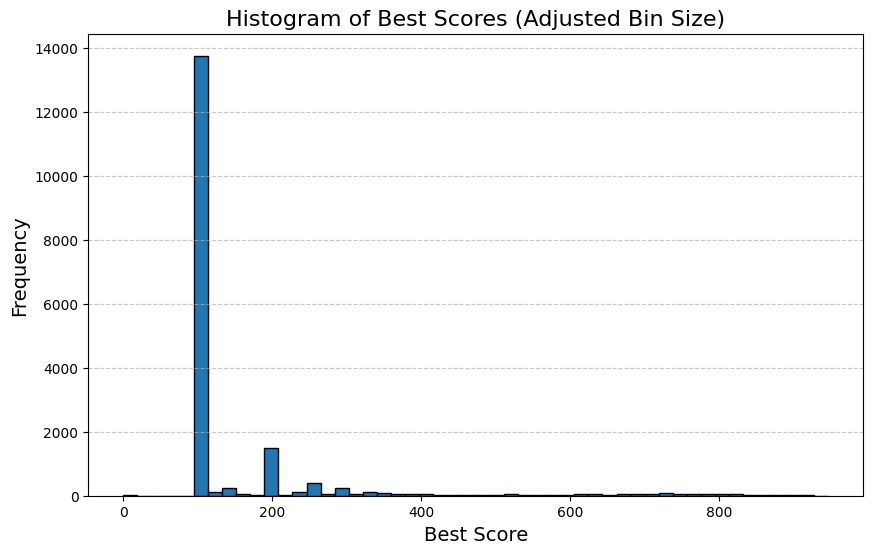

In [139]:
# Adjusted histogram for 'best_score' with more bins
plt.figure(figsize=(10, 6))
plt.hist(df['best_score'], bins=50, edgecolor='black')  # Increased bins to 50
plt.title('Histogram of Best Scores (Adjusted Bin Size)', fontsize=16)
plt.xlabel('Best Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [140]:
# Get the value counts for the 'recipe_name' column
df['recipe_name'].value_counts()

recipe_name
Cheeseburger Soup          666
Creamy White Chili         578
Best Ever Banana Bread     506
Basic Homemade Bread       397
Favorite Chicken Potpie    390
                          ... 
Bacon Macaroni Salad        95
Blueberry French Toast      88
Lime Chicken Tacos          86
Caramel Heavenlies          85
Vegetarian Linguine         31
Name: count, Length: 100, dtype: int64

In [141]:
# Get the minimum and maximum dates
min_date = df['created_at'].min()
max_date = df['created_at'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2021-02-11 09:22:16
Maximum date: 2022-10-14 14:00:35


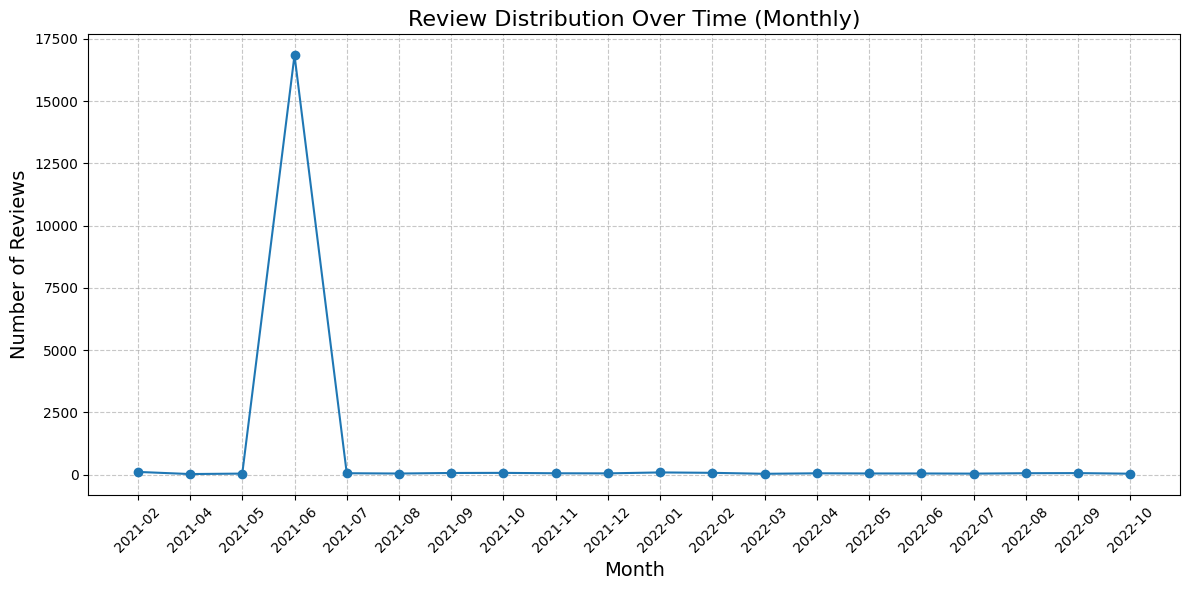

In [142]:
# Group data by month and count reviews
df['month'] = df['created_at'].dt.to_period('M')
monthly_review_distribution = df.groupby('month').size()

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
plt.plot(monthly_review_distribution.index.astype(str), monthly_review_distribution.values, marker='o')
plt.title('Review Distribution Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [143]:
df['user_name'].value_counts()

user_name
2124arizona        28
JGa2595176         27
No_Time_To_Cook    25
mjlouk             25
justmbeth          23
                   ..
Terry_V             1
billt1620           1
jjheath             1
Poeschl             1
cafritz             1
Name: count, Length: 13581, dtype: int64

In [144]:
min_rep = df['user_reputation'].min()
max_rep = df['user_reputation'].max()

print(f"Minimum Rep: {min_rep}")
print(f"Maximum Rep: {max_rep}")

Minimum Rep: 0
Maximum Rep: 520


In [145]:
df['user_reputation'].value_counts()

user_reputation
1      16631
10       652
20       284
0        150
30        74
50        18
40        15
80         9
90         7
60         6
100        5
510        3
110        3
70         3
130        2
140        2
160        1
300        1
220        1
170        1
520        1
150        1
Name: count, dtype: int64

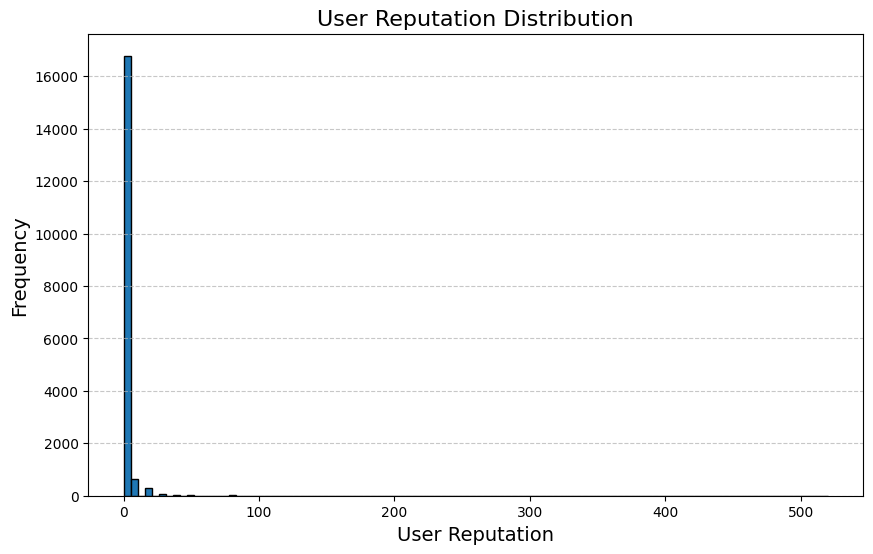

In [146]:
# Plot the histogram for 'user_reputation'
plt.figure(figsize=(10, 6))
plt.hist(df['user_reputation'], bins=100, edgecolor='black')
plt.title('User Reputation Distribution', fontsize=16)
plt.xlabel('User Reputation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [147]:
# Group by recipe_number and compute summary statistics
summary_stats = df.groupby('recipe_number').agg(
    total_comments=('comment_id', 'count'),       # Count of comments
    avg_user_reputation=('user_reputation', 'mean'),  # Average user reputation
    avg_reply_count=('reply_count', 'mean'),     # Average reply count
    avg_thumbs_up=('thumbs_up', 'mean'),         # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),     # Average thumbs down
    avg_star_rating=('stars', 'mean'),           # Average star rating
    avg_best_score=('best_score', 'mean')        # Average best score
).reset_index()

# Display the results
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
0,1,578,1.451557,0.017301,0.574394,0.250865,4.508651,134.769896
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470
2,3,666,1.681682,0.024024,1.102102,0.732733,4.558559,139.584084
3,4,335,3.029851,0.008955,2.892537,0.979104,4.525373,192.319403
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000
6,7,367,1.880109,0.010899,0.787466,0.457766,4.607629,161.021798
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988


In [148]:
# Add a ratio column for thumbs up to thumbs down
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['avg_thumbs_up'] / summary_stats['avg_thumbs_down']

# Handle cases where thumbs down is 0 to avoid division by zero
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['thumbs_up_to_down_ratio'].replace([float('inf'), -float('inf')], None).fillna(0)

# Display the updated summary table
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
0,1,578,1.451557,0.017301,0.574394,0.250865,4.508651,134.769896,2.289655
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470,2.469697
2,3,666,1.681682,0.024024,1.102102,0.732733,4.558559,139.584084,1.504098
3,4,335,3.029851,0.008955,2.892537,0.979104,4.525373,192.319403,2.954268
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269,2.000000
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000,2.442953
6,7,367,1.880109,0.010899,0.787466,0.457766,4.607629,161.021798,1.720238
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734,1.183206
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837,2.620253
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988,1.766667


In [149]:
summary_stats.tail(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
90,91,85,1.329412,0.000000,0.129412,0.023529,3.341176,110.270588,5.500000
91,92,114,4.500000,0.008772,3.114035,1.692982,4.570175,219.684211,1.839378
92,93,109,2.605505,0.000000,0.724771,0.541284,4.321101,150.385321,1.338983
93,94,96,3.197917,0.020833,1.583333,1.197917,4.395833,169.958333,1.321739
94,95,95,3.073684,0.010526,0.821053,0.894737,4.284211,140.326316,0.917647
95,96,109,2.211009,0.000000,0.348624,0.256881,4.440367,143.623853,1.357143
96,97,86,2.430233,0.000000,0.372093,0.220930,3.976744,132.000000,1.684211
97,98,128,6.539062,0.007812,2.992188,1.562500,4.390625,224.265625,1.915000
98,99,112,4.017857,0.000000,1.258929,0.535714,4.258929,188.821429,2.350000
99,100,119,3.336134,0.033613,1.554622,0.789916,4.369748,208.865546,1.968085


In [150]:
top_recipes = df.groupby(['recipe_number', 'recipe_name']).size().reset_index(name='total_comments')
top10 = top_recipes.sort_values(by='recipe_number', ascending=True)

top10.head(10)

,recipe_number,recipe_name,total_comments
0,1,Creamy White Chili,578
1,2,Best Ever Banana Bread,506
2,3,Cheeseburger Soup,666
3,4,Amish Breakfast Casserole,335
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,197
5,6,Favorite Chicken Potpie,390
6,7,Flavorful Chicken Fajitas,367
7,8,Apple Pie,241
8,9,Enchilada Casser-Ole!,331
9,10,Zucchini Pizza Casserole,332


In [151]:
# Trying to understand the number of stars for each recipe number, what are the weights for each rating number
# Recipe 3 has more 5 stars and less 0 stars than recipe 1.... why is that? - Is the ratio different between 1,2 and 3

star_counts = df.groupby(['recipe_number', 'stars']).size().unstack(fill_value=0)
print("\nStar Counts for Each Recipe:")
print(star_counts)


Star Counts for Each Recipe:
stars           0  1  2   3   4    5
recipe_number                       
1              39  6  2  10  39  482
2              24  7  7   8  25  435
3              24  9  8  21  72  532
4              15  4  4  11  34  267
5              16  2  0   5   8  166
...            .. .. ..  ..  ..  ...
96              7  1  0   3  16   82
97             10  3  3   3  11   56
98              8  3  0   8  10   99
99              6  4  2   5  21   74
100             6  2  4   6  13   88

[100 rows x 6 columns]


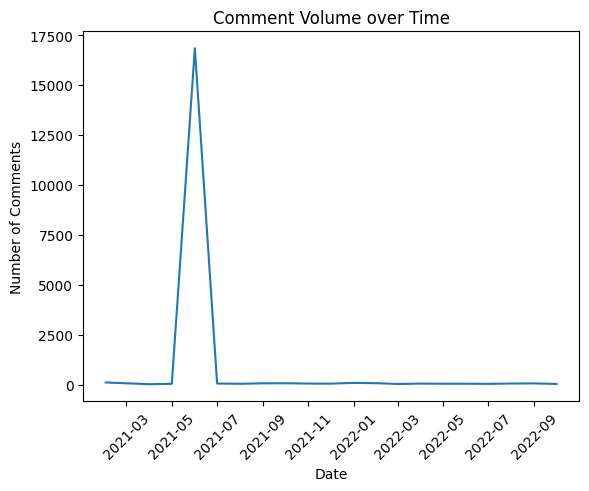

In [152]:
comment_volume = df.groupby(df['created_at'].dt.to_period('M')).size().reset_index(name='comment_count')

plt.plot(comment_volume['created_at'].dt.to_timestamp(), comment_volume['comment_count'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.title('Comment Volume over Time')
plt.show()

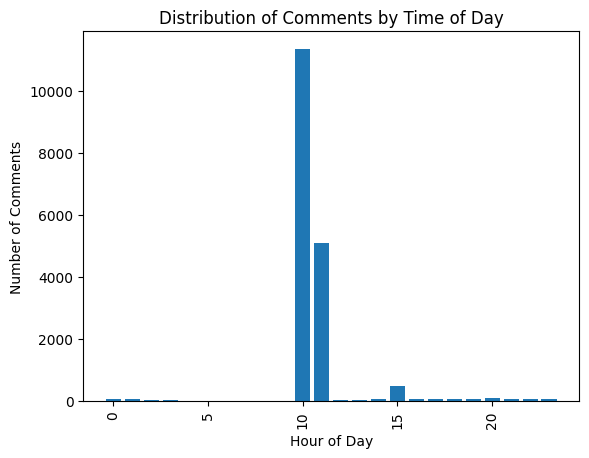

In [153]:
# Majority of comments occur at 10/11 am (Before lunch time to prep the recipe???)

df['hour'] = df['created_at'].dt.hour

hourly_distribution = df.groupby('hour').size().reset_index(name='comment_count')

#Plot the distribution
plt.bar(hourly_distribution['hour'], hourly_distribution['comment_count'])
plt.xlabel('Hour of Day')
plt.xticks(rotation=90)
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Time of Day')
plt.show()

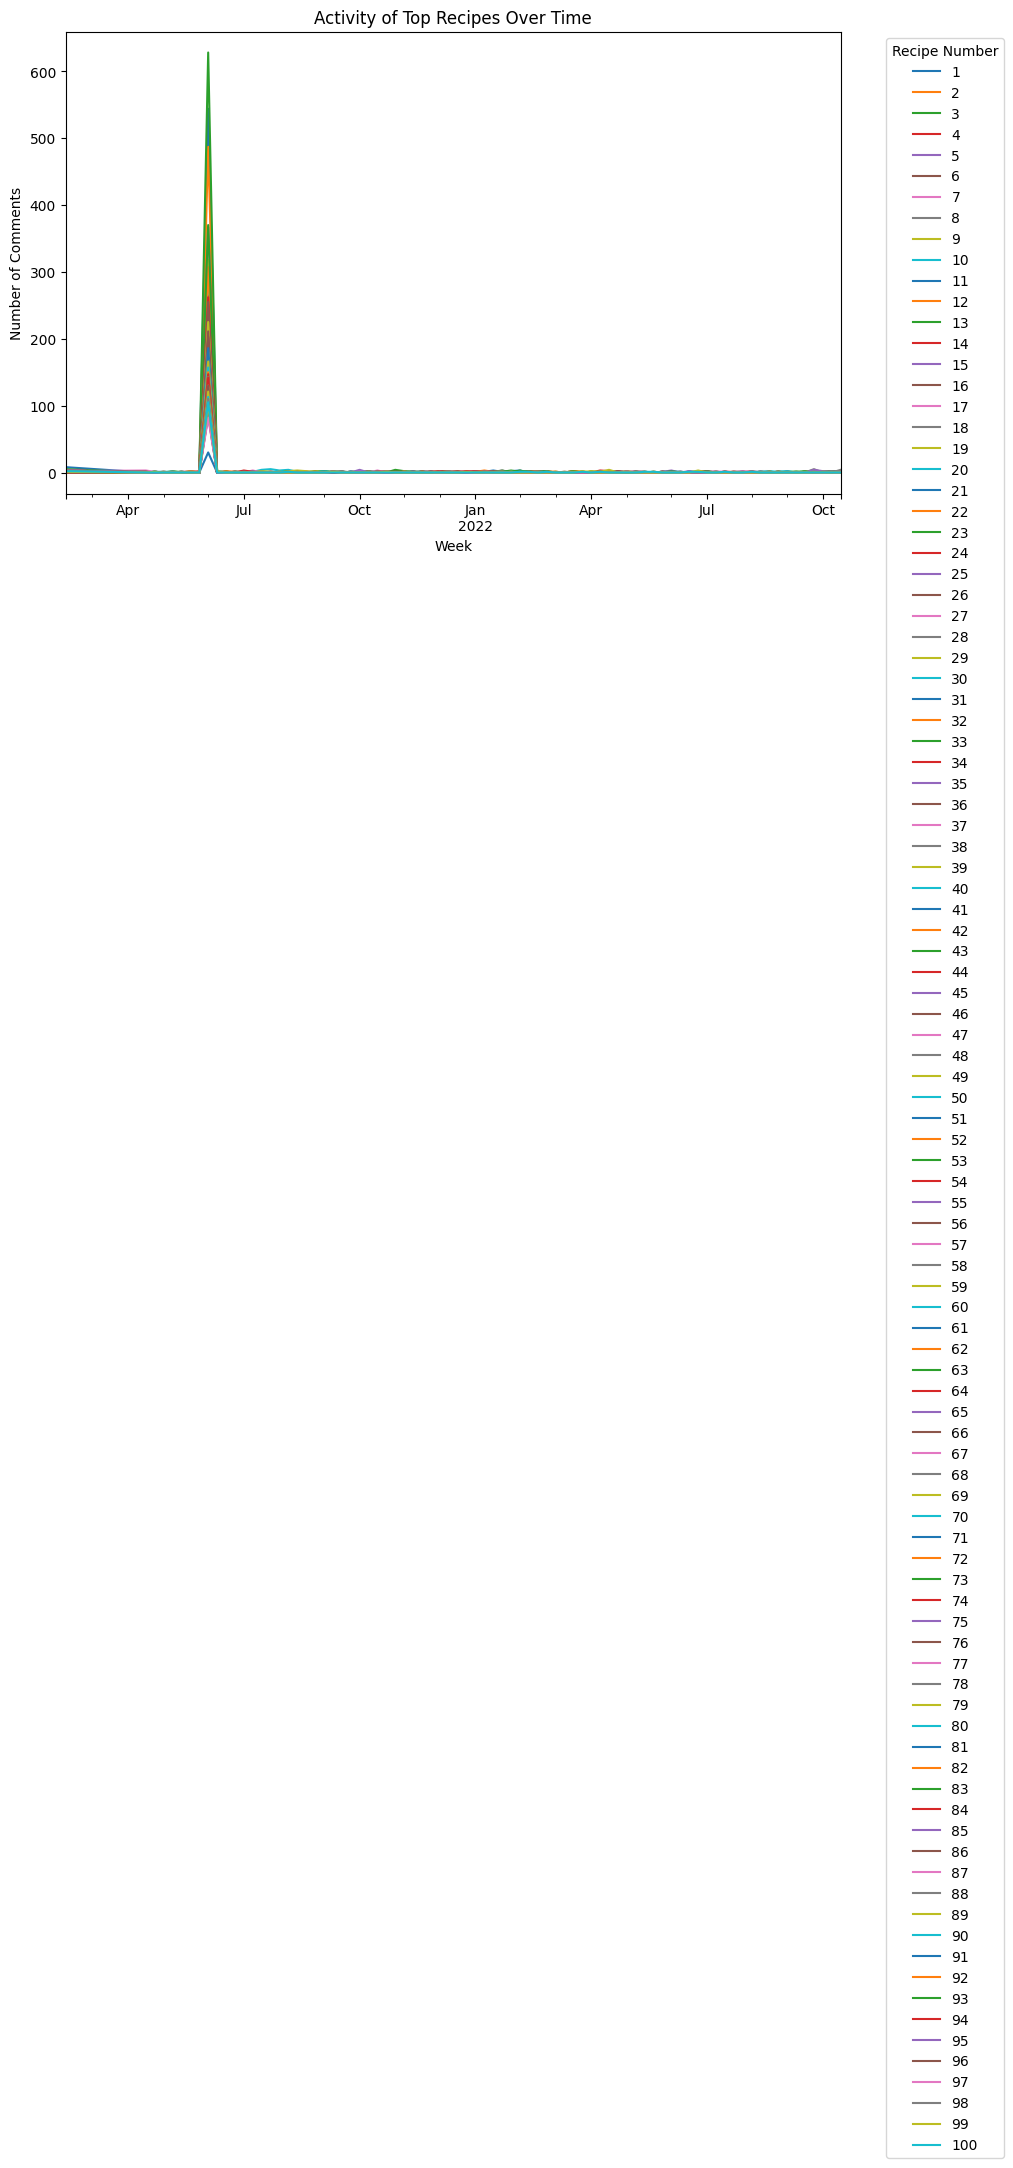

In [154]:
# All the comments were happening in June

# Group by recipe_number and week
recipe_timeline = df.groupby([df['created_at'].dt.to_period('W'), 'recipe_number']).size().unstack(fill_value=0)

# Plot the activity of top recipes
recipe_timeline.plot(figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Comments')
plt.title('Activity of Top Recipes Over Time')
plt.legend(title='Recipe Number', bbox_to_anchor=(1.05, 1))
plt.show()

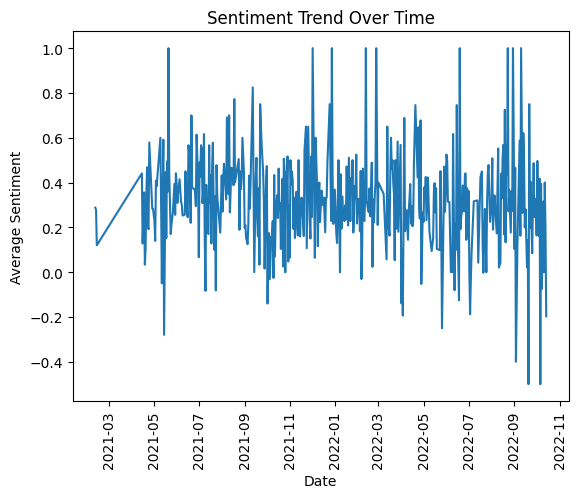

In [155]:
from textblob import TextBlob

# Calculate sentiment polarity for each comment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Group by day and calculate average sentiment
sentiment_trend = df.groupby(df['created_at'].dt.to_period('D'))['sentiment'].mean().reset_index()

# Plot sentiment over time
plt.plot(sentiment_trend['created_at'].dt.to_timestamp(), sentiment_trend['sentiment'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Sentiment')
plt.title('Sentiment Trend Over Time')
plt.show()

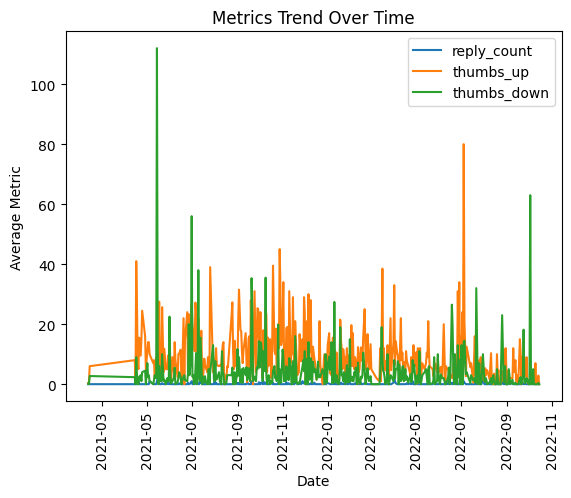

In [156]:
# Group by day and calculate averages
metrics_trend = df.groupby(df['created_at'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()

# Plot each metric over time
for metric in ['reply_count', 'thumbs_up', 'thumbs_down']:
    plt.plot(metrics_trend['created_at'].dt.to_timestamp(), metrics_trend[metric], label=metric)

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Metric')
plt.title('Metrics Trend Over Time')
plt.legend()
plt.show()

In [157]:
# Sort the dataset by 'thumbs_up' in descending order
top_thumbs_up_comments = df.sort_values(by='thumbs_up', ascending=False)

# Select relevant columns to display (including recipe_number and the full text comment)
top_comments = top_thumbs_up_comments[['recipe_number', 'text', 'thumbs_up']].head(30)

# Display the top comments with the highest thumbs up
top_comments.reset_index()

,index,recipe_number,text,thumbs_up
0,15852,81,goodeasy recipe u snarky bully feel need comme...,106
1,14778,73,fat free half half half half skim milk lot sug...,80
2,13347,62,enjoys review rarely make recipe jawdropping a...,79
3,4191,11,recipe one tends adjust taste said toh altered...,76
4,16497,86,like ingredient portion put together upright m...,76
5,16877,89,remember time long long ago lolwhen mom making...,76
6,4473,12,really liked recipe family make minor change h...,73
7,1192,3,look delicious want make slow cooker anything ...,69
8,3433,9,im always surprised someone change recipe rate...,68
9,17010,90,made company tonight served warm vanilla ice c...,60


In [158]:
# What is the ratio of 5 stars compared to other stars for each recipe

# Count total ratings for each recipe
total_counts = df.groupby('recipe_number').size().reset_index(name='total_ratings')

# Count 5-star ratings for each recipe
five_star_counts = df[df['stars'] == 5].groupby('recipe_number').size().reset_index(name='five_star_count')

# Merge total ratings and 5-star ratings
merged_counts = pd.merge(total_counts, five_star_counts, on='recipe_number', how='left')

# Fill NaN values in five_star_count (for recipes without any 5-star ratings) with 0
merged_counts['five_star_count'] = merged_counts['five_star_count'].fillna(0)

# Calculate the ratio of 5-star ratings to total ratings
merged_counts['five_star_ratio'] = merged_counts['five_star_count'] / merged_counts['total_ratings']

# Display the results
print("Five-Star Ratio for Each Recipe:")
print(merged_counts[['recipe_number', 'five_star_ratio']])

Five-Star Ratio for Each Recipe:
    recipe_number  five_star_ratio
0               1         0.833910
1               2         0.859684
2               3         0.798799
3               4         0.797015
4               5         0.842640
..            ...              ...
95             96         0.752294
96             97         0.651163
97             98         0.773438
98             99         0.660714
99            100         0.739496

[100 rows x 2 columns]


## Sentiment Analysis

Test Accuracy: 0.8494683827644096


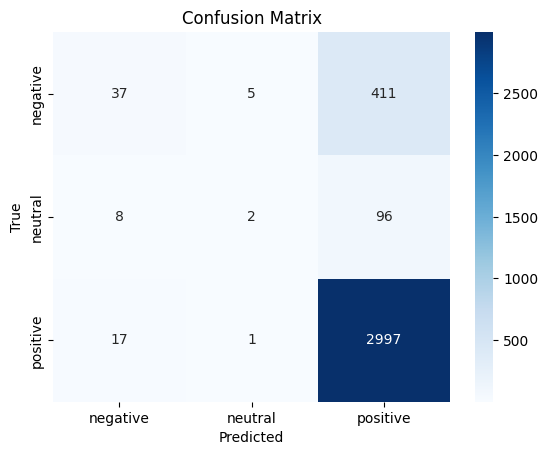

Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.08      0.14       453
     neutral       0.25      0.02      0.04       106
    positive       0.86      0.99      0.92      3015

    accuracy                           0.85      3574
   macro avg       0.57      0.36      0.37      3574
weighted avg       0.80      0.85      0.79      3574



In [159]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your actual dataset if needed)
df = df.dropna(subset=['text', 'stars', 'approval_rating'])  # Ensure no missing values
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels as integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(label_mapping)

# Preprocess text, approval rating, and labels
texts = df['text'].astype(str).tolist()
approval_ratings = df['approval_rating'].tolist()
labels = df['sentiment_encoded'].tolist()

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_rating, X_test_rating, y_train, y_test = train_test_split(
    texts, approval_ratings, labels, test_size=0.2, random_state=42
)

# Combine text and approval ratings for modeling
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use TF-IDF for text representation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_text).toarray()

# Normalize approval ratings and combine with TF-IDF features
X_train_rating = np.array(X_train_rating).reshape(-1, 1) / 100.0  # Normalize to 0-1 range
X_test_rating = np.array(X_test_rating).reshape(-1, 1) / 100.0
X_train = np.hstack((X_train_tfidf, X_train_rating))
X_test = np.hstack((X_test_tfidf, X_test_rating))

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = rf_classifier.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

### Integrating SMOTE to Sentiment Analysis

Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.27      0.35       453
     neutral       0.24      0.06      0.09       106
    positive       0.88      0.96      0.92      3015

    accuracy                           0.85      3574
   macro avg       0.54      0.43      0.45      3574
weighted avg       0.81      0.85      0.82      3574



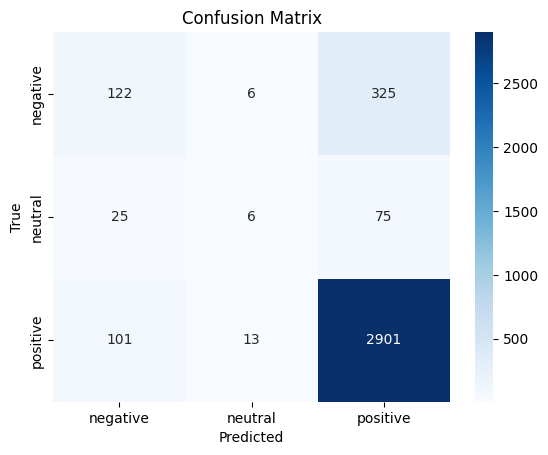

In [160]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

SMOTE only improves it incrementally so likely to remove for exam

# Classifying Models

Training Random Forest...
Random Forest Accuracy: 0.8494683827644096
Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.08      0.14       453
     neutral       0.25      0.02      0.04       106
    positive       0.86      0.99      0.92      3015

    accuracy                           0.85      3574
   macro avg       0.57      0.36      0.37      3574
weighted avg       0.80      0.85      0.79      3574



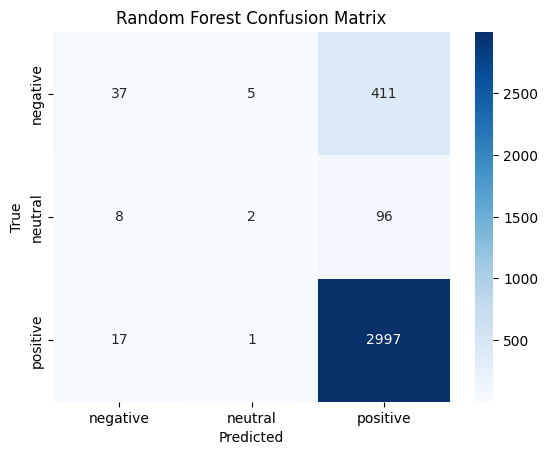

Training Logistic Regression...
Logistic Regression Accuracy: 0.8592613318410744
Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.17      0.27       453
     neutral       0.56      0.08      0.15       106
    positive       0.87      0.99      0.92      3015

    accuracy                           0.86      3574
   macro avg       0.70      0.41      0.45      3574
weighted avg       0.83      0.86      0.82      3574



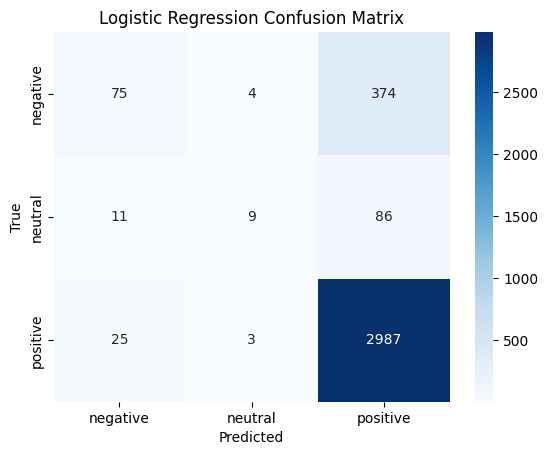

Training Support Vector Machine (SVM)...
Support Vector Machine (SVM) Accuracy: 0.8435926133184107
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       453
     neutral       0.00      0.00      0.00       106
    positive       0.84      1.00      0.92      3015

    accuracy                           0.84      3574
   macro avg       0.28      0.33      0.31      3574
weighted avg       0.71      0.84      0.77      3574



/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

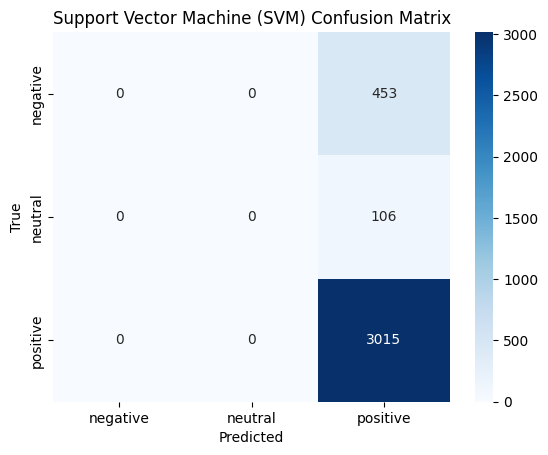


Model F1-Score Summary:
Random Forest: 0.85
Logistic Regression: 0.86
Support Vector Machine (SVM): 0.84


In [161]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Example data preprocessing (modify as per your dataset)
df = df.dropna(subset=['text', 'stars', 'approval_rating'])  # Ensure no missing values
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment_classifier'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels as integers
label_mapping_classifier = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded_classifier'] = df['sentiment_classifier'].map(label_mapping_classifier)

# Split dataset
X_text_classifier = df['text'].astype(str)
X_rating_classifier = df['approval_rating']
y_classifier = df['sentiment_encoded_classifier']

# Split data for training and testing
X_train_text_classifier, X_test_text_classifier, X_train_rating_classifier, X_test_rating_classifier, y_train_classifier, y_test_classifier = train_test_split(
    X_text_classifier, X_rating_classifier, y_classifier, test_size=0.2, random_state=42
)

# TF-IDF Vectorizer for text
tfidf_vectorizer_classifier = TfidfVectorizer(max_features=5000)
X_train_tfidf_classifier = tfidf_vectorizer_classifier.fit_transform(X_train_text_classifier).toarray()
X_test_tfidf_classifier = tfidf_vectorizer_classifier.transform(X_test_text_classifier).toarray()

# Normalize approval ratings
X_train_rating_classifier = np.array(X_train_rating_classifier).reshape(-1, 1) / 100.0
X_test_rating_classifier = np.array(X_test_rating_classifier).reshape(-1, 1) / 100.0

# Model-Specific Features
models_classifier = {
    "Random Forest": {
        "features_train": np.hstack((X_train_tfidf_classifier, X_train_rating_classifier)),
        "features_test": np.hstack((X_test_tfidf_classifier, X_test_rating_classifier)),
        "model": RandomForestClassifier(n_estimators=100, random_state=42)
    },
    "Logistic Regression": {
        "features_train": X_train_tfidf_classifier,  # Only text features
        "features_test": X_test_tfidf_classifier,
        "model": LogisticRegression(max_iter=1000, random_state=42)
    },
    "Support Vector Machine (SVM)": {
        "features_train": X_train_rating_classifier,  # Only approval rating
        "features_test": X_test_rating_classifier,
        "model": SVC(kernel='linear', random_state=42)
    }
}

# Train and Evaluate Models
results_classifier = {}
for model_name, model_info in models_classifier.items():
    print(f"Training {model_name}...")
    model_classifier = model_info["model"]
    X_train_classifier = model_info["features_train"]
    X_test_classifier = model_info["features_test"]

    # Train the model
    model_classifier.fit(X_train_classifier, y_train_classifier)

    # Evaluate the model
    y_pred_classifier = model_classifier.predict(X_test_classifier)
    accuracy_classifier = model_classifier.score(X_test_classifier, y_test_classifier)
    results_classifier[model_name] = accuracy_classifier

    print(f"{model_name} Accuracy: {accuracy_classifier}")
    print("Classification Report:")
    print(classification_report(y_test_classifier, y_pred_classifier, target_names=label_mapping_classifier.keys()))

    # Confusion Matrix
    cm_classifier = confusion_matrix(y_test_classifier, y_pred_classifier)
    sns.heatmap(cm_classifier, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping_classifier.keys(), yticklabels=label_mapping_classifier.keys())
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Summary of Model Accuracies
print("\nModel F1-Score Summary:")
for model_name, f1 in results_classifier.items():
    print(f"{model_name}: {f1:.2f}")

# Deep Learning Models

- Predict star ratings of reviews based on text

### Text classification model built using a Deep Neural Network (DNN) architecture with an Embedding Layer and a Global Average Pooling Layer.

Epoch 1/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - loss: 1.0668 - val_loss: 0.6313
Epoch 2/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.7703 - val_loss: 0.6039
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.6948 - val_loss: 0.5863
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.6444 - val_loss: 0.5781
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.6147 - val_loss: 0.5712
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.5978 - val_loss: 0.5268
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.5619 - val_loss: 0.5053
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.5343 - val_loss: 0.4892
Epoch 9/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.5034 - val_loss: 0.4740
Epoch 10/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.4838 - val_loss: 0.4746
Epoch 11/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.4815 - val_loss: 0.5193
Epoch 12/20
406/406 ━━━━━━━━━━

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

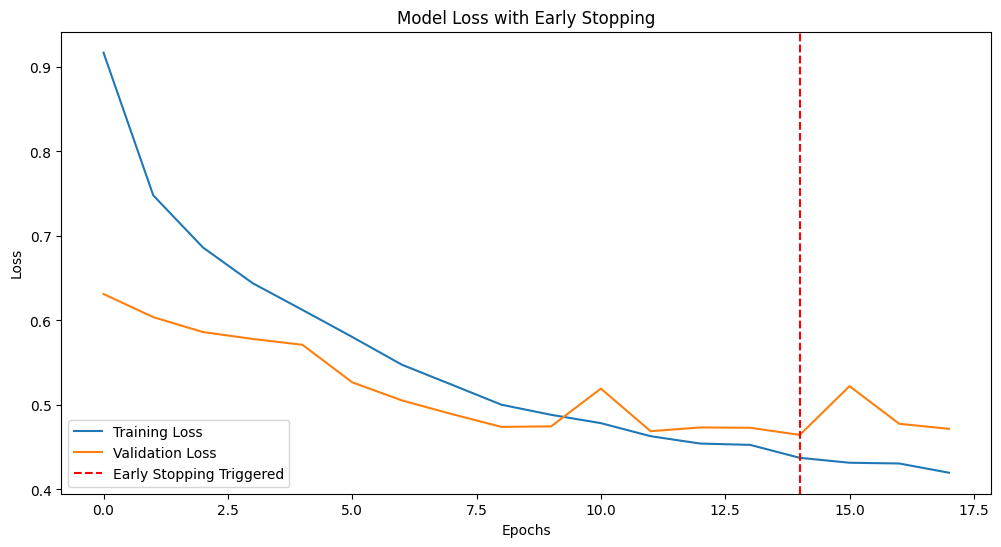

In [178]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Step 1: Filter valid data
df = df.dropna(subset=['text', 'stars'])
df = df[df['stars'].between(1, 5)]  # Ensure stars values are between 1 and 5

# Step 2: Preprocess the text data
dnn_texts = df['text'].astype(str)
dnn_labels = df['stars']

# Step 3: Split the dataset
dnn_X_train, dnn_X_test, dnn_y_train, dnn_y_test = train_test_split(
    dnn_texts, dnn_labels, test_size=0.2, random_state=42
)

# Step 4: Tokenize text data
dnn_tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
dnn_tokenizer.fit_on_texts(dnn_X_train)

dnn_X_train_seq = dnn_tokenizer.texts_to_sequences(dnn_X_train)
dnn_X_test_seq = dnn_tokenizer.texts_to_sequences(dnn_X_test)

# Step 5: Pad sequences
dnn_max_len = 100
dnn_X_train_padded = pad_sequences(dnn_X_train_seq, maxlen=dnn_max_len, padding='post', truncating='post')
dnn_X_test_padded = pad_sequences(dnn_X_test_seq, maxlen=dnn_max_len, padding='post', truncating='post')

# Convert labels to 0-indexed (since stars are 1-5, subtract 1)
dnn_y_train = dnn_y_train - 1
dnn_y_test = dnn_y_test - 1

# Step 6: Build the model
dnn_num_classes = 5

dnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(dnn_num_classes, activation='softmax')  # Softmax for multi-class output
])

dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Multi-class loss function
                  metrics=[])  # Remove accuracy to calculate F1-score separately

# Step 7: Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)

# Step 8: Train the model
dnn_history = dnn_model.fit(
    dnn_X_train_padded, 
    dnn_y_train, 
    epochs=20,  # Set a higher number of epochs
    validation_data=(dnn_X_test_padded, dnn_y_test),
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Step 9: Evaluate the model
# Predict classes for the test set
dnn_y_test_pred_probs = dnn_model.predict(dnn_X_test_padded)
dnn_y_test_pred = tf.argmax(dnn_y_test_pred_probs, axis=1).numpy()

# Classification Report
dnn_class_report = classification_report(dnn_y_test, dnn_y_test_pred, target_names=[str(i) for i in range(1, 6)])
print("\nClassification Report:")
print(dnn_class_report)

# Calculate F1-score
dnn_f1 = f1_score(dnn_y_test, dnn_y_test_pred, average='weighted')
print(f"Test F1-Score: {dnn_f1:.4f}")

# Step 10: Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(dnn_history.history['loss'], label='Training Loss')
plt.plot(dnn_history.history['val_loss'], label='Validation Loss')
plt.axvline(x=len(dnn_history.history['loss']) - early_stopping.patience - 1, color='red', linestyle='--', label='Early Stopping Triggered')
plt.title('Model Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The “loss” represents how far off the model’s predictions are from the true labels. Specifically:
	•	Training Loss: Measures the error the model makes on the training data.
	•	Validation Loss: Measures the error the model makes on unseen (validation) data.
    
The graph shows that both training and validation loss decrease over time, meaning the model is learning effectively.

The validation loss is slightly higher than the training loss, which is normal and indicates the model generalizes well. Since the losses flatten at the end and there’s no large gap, the model is not overfitting.

## LSTM Model (all)

Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


406/406 ━━━━━━━━━━━━━━━━━━━━ 37s 84ms/step - loss: 0.7030 - val_loss: 0.6020
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - loss: 0.6105 - val_loss: 0.6000
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - loss: 0.6231 - val_loss: 0.6003
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - loss: 0.5992 - val_loss: 0.7185
Epoch 5/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 40s 98ms/step - loss: 0.3383 - val_loss: 0.7097
Epoch 6/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - loss: 0.2578 - val_loss: 0.7836
Epoch 7/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - loss: 0.2001 - val_loss: 0.6055
Epoch 8/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - loss: 0.1897 - val_loss: 0.6174
Epoch 9/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - loss: 0.1882 - val_loss: 0.6328
Epoch 10/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - loss: 0.1641 - val_loss: 0.6329
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
General Model Test F1-Score: 0.7736

Classification Report
              precision    re

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

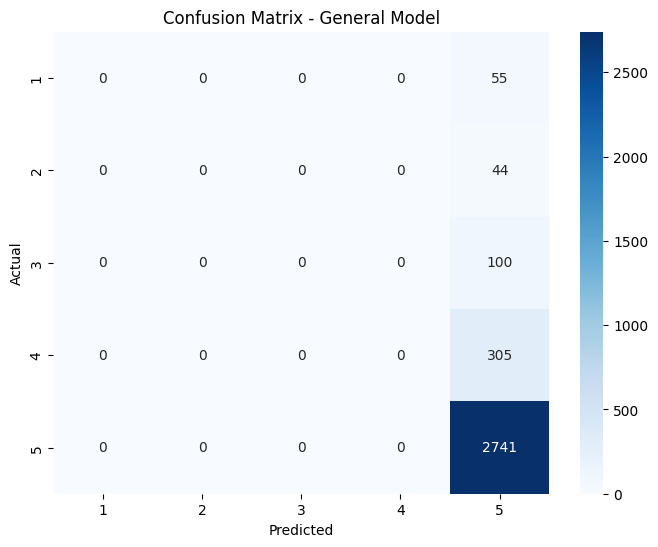

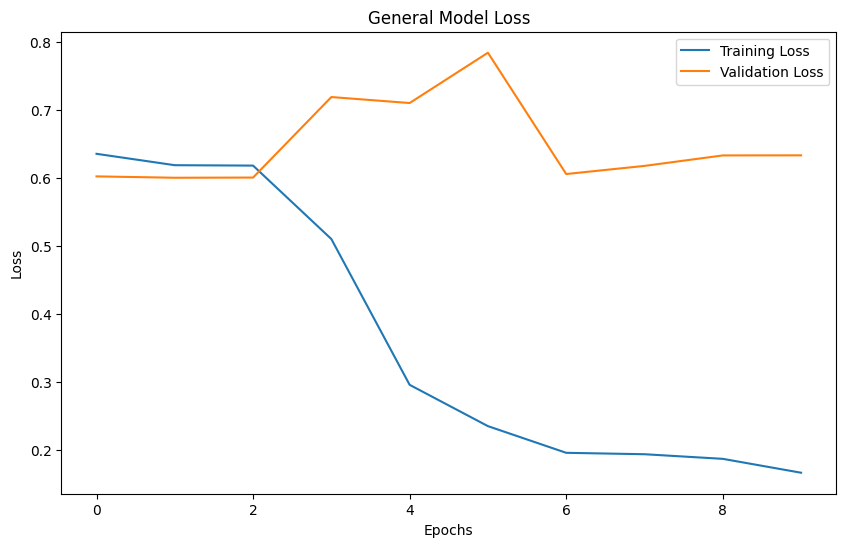

In [163]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the DataFrame for the general LSTM model
df_general = df.copy()

# Filter valid data for the general LSTM model
df_general = df_general.dropna(subset=['comment_id', 'stars'])
df_general = df_general[df_general['stars'].between(1, 5)]

# Preprocess the text data
texts_general = df_general['comment_id'].astype(str)
labels_general = df_general['stars']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    texts_general, labels_general, test_size=0.2, random_state=42
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to 0-indexed
y_train = y_train - 1
y_test = y_test - 1

# Build and train the model
num_classes = 5
model_general = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_general.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=[])

history_general = model_general.fit(
    X_train_padded, y_train,
    epochs=10,
    validation_data=(X_test_padded, y_test),
    batch_size=32
)

# Step 1: Predict classes for the test set
y_pred_probs = model_general.predict(X_test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# Step 2: Calculate F1 score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"General Model Test F1-Score: {f1:.4f}")

# Step 3: Classification Report
print("\nClassification Report")
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(1, 6)]))

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[str(i) for i in range(1, 6)], 
            yticklabels=[str(i) for i in range(1, 6)])
plt.title('Confusion Matrix - General Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 5: Plot training and validation accuracy and loss
# Training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_general.history['loss'], label='Training Loss')
plt.plot(history_general.history['val_loss'], label='Validation Loss')
plt.title('General Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM for Specific Recipe

In [188]:
# Set Pandas option to display all rows
pd.set_option('display.max_rows', None)

# Display value counts
print(df['recipe_name'].value_counts())

recipe_name
Cheeseburger Soup                                    642
Creamy White Chili                                   539
Best Ever Banana Bread                               482
Favorite Chicken Potpie                              364
Flavorful Chicken Fajitas                            344
Basic Homemade Bread                                 326
Zucchini Pizza Casserole                             324
Amish Breakfast Casserole                            320
Cauliflower Soup                                     308
Enchilada Casser-Ole!                                288
Traditional Lasagna                                  261
Rustic Italian Tortellini Soup                       260
Zucchini Cupcake                                     243
Apple Pie                                            218
Moist Chocolate Cake                                 210
Hot Milk Cake                                        209
Stuffed Pepper Soup                                  208
Mom’s Meat Loaf    

Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - loss: 1.6111 - val_loss: 1.5617
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.5523 - val_loss: 1.4280
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.4159 - val_loss: 1.2004
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.1870 - val_loss: 0.8974
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.9230 - val_loss: 0.6325
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7069 - val_loss: 0.5035
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6268 - val_loss: 0.4670
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5406 - val_loss: 0.4595
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.6673 - val_loss: 0.4574
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6204 - val_loss: 0.4562
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
Caramel Heavenlies Model Test F1-Score: 0.8768

Caramel Heavenlies Model Classification Report
              precision    recall  f1-score  

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

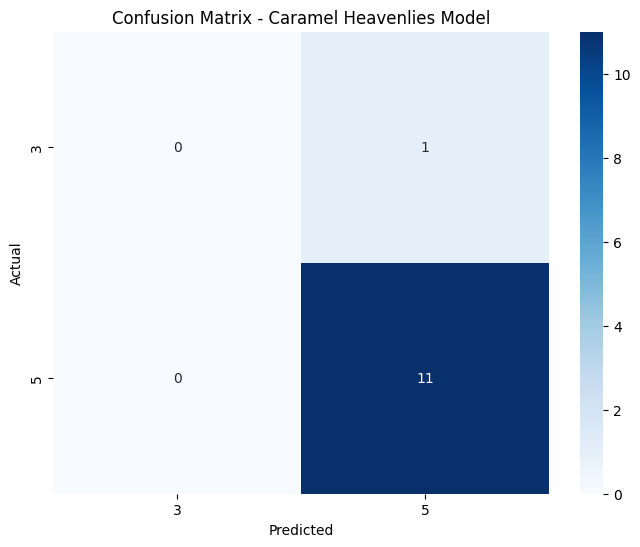

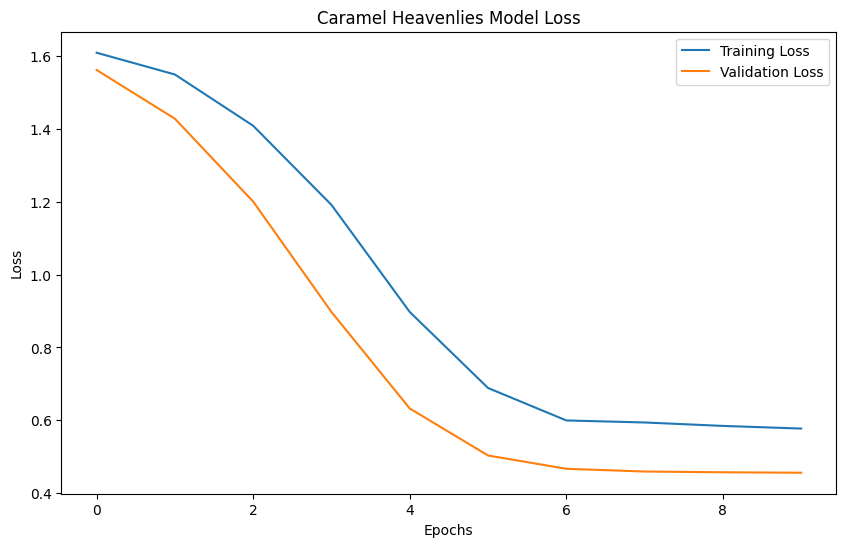

In [191]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the DataFrame for the specific recipe
df_specific = df.copy()

# Filter for the specific recipe
specific_recipe = "Caramel Heavenlies"
df_specific = df_specific.dropna(subset=['comment_id', 'stars', 'recipe_name'])
df_specific = df_specific[df_specific['stars'].between(1, 5)]
df_specific = df_specific[df_specific['recipe_name'] == specific_recipe]

# Check if there are enough reviews for the recipe
if df_specific.shape[0] < 1:
    raise ValueError(f"No reviews found for the recipe '{specific_recipe}'.")

# Preprocess the text and labels
texts_specific = df_specific['comment_id'].astype(str)
labels_specific = df_specific['stars']

# Handle small datasets
if df_specific.shape[0] < 2:
    print(f"Warning: Only {df_specific.shape[0]} review(s) found for '{specific_recipe}'.")
    X_train, X_test, y_train, y_test = texts_specific, texts_specific, labels_specific, labels_specific
else:
    X_train, X_test, y_train, y_test = train_test_split(
        texts_specific, labels_specific, test_size=0.2, random_state=42
    )

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to 0-indexed
y_train = y_train - 1
y_test = y_test - 1

# Step 2: Build and Train the LSTM Model
num_classes = 5
model_specific = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_specific.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=[])

# Train the model
history_specific = model_specific.fit(
    X_train_padded, y_train,
    epochs=10,
    validation_data=(X_test_padded, y_test),
    batch_size=32
)

# Step 3: Evaluate with F1-Score
# Predict and generate predicted classes
y_pred_probs = model_specific.predict(X_test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"{specific_recipe} Model Test F1-Score: {f1:.4f}")

# Step 4: Classification Report
# Dynamically set target names based on unique classes
unique_classes = sorted(y_test.unique())
target_names = [str(label + 1) for label in unique_classes]  # Adjust to match star ratings

print(f"\n{specific_recipe} Model Classification Report")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {specific_recipe} Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 6: Visualize Training and Validation Metrics
# Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_specific.history['loss'], label='Training Loss')
plt.plot(history_specific.history['val_loss'], label='Validation Loss')
plt.title(f'{specific_recipe} Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NLP

## Based on Sentiment Analysis

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 811
max_resources_: 12979
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 27
n_resources: 811
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 14
n_resources: 1622
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 2
n_candidates: 7
n_resources: 3244
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 4
n_resources: 6488
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 12976
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.90


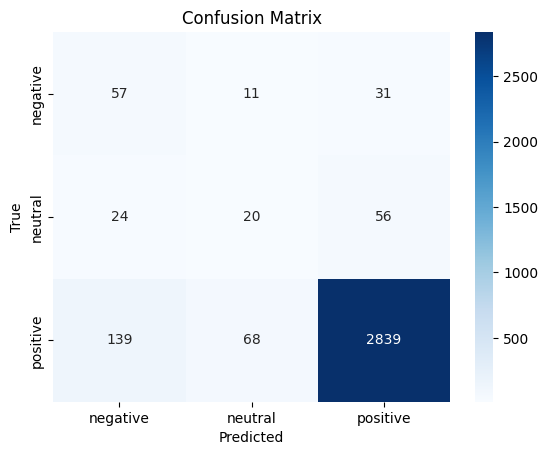

Classification Report:
              precision    recall  f1-score   support

    negative       0.26      0.58      0.36        99
     neutral       0.20      0.20      0.20       100
    positive       0.97      0.93      0.95      3046

    accuracy                           0.90      3245
   macro avg       0.48      0.57      0.50      3245
weighted avg       0.92      0.90      0.91      3245



In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv  # Enable HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data cleaning and preprocessing
df = df.dropna(subset=['text', 'stars', 'approval_rating'])  # Ensure no missing values
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment categories
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels into integers
sentiment_label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_label_mapping)

# Extract features and labels
model_texts = df['text'].astype(str).tolist()
model_approval_ratings = df['approval_rating'].tolist()
model_labels = df['sentiment_encoded'].tolist()

# Split the data into training and testing sets
train_texts, test_texts, train_ratings, test_ratings, train_labels, test_labels = train_test_split(
    model_texts, model_approval_ratings, model_labels, test_size=0.2, random_state=42
)

# Text feature extraction using TF-IDF
tfidf_model_vectorizer = TfidfVectorizer(max_features=5000)
train_tfidf_features = tfidf_model_vectorizer.fit_transform(train_texts).toarray()
test_tfidf_features = tfidf_model_vectorizer.transform(test_texts).toarray()

# Normalize approval ratings and combine with TF-IDF features
normalized_train_ratings = np.array(train_ratings).reshape(-1, 1) / 100.0
normalized_test_ratings = np.array(test_ratings).reshape(-1, 1) / 100.0
final_train_features = np.hstack((train_tfidf_features, normalized_train_ratings))
final_test_features = np.hstack((test_tfidf_features, normalized_test_ratings))

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# HalvingGridSearchCV for faster hyperparameter tuning
halving_grid_search = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1_weighted',
    factor=2,  # Controls the rate of resource reduction
    verbose=1,
    n_jobs=-1
)

# Fit the model with HalvingGridSearchCV
halving_grid_search.fit(final_train_features, train_labels)

# Best parameters from HalvingGridSearchCV
best_rf_classifier = halving_grid_search.best_estimator_
print(f"Best Parameters: {halving_grid_search.best_params_}")

# Evaluate the model
predicted_labels = best_rf_classifier.predict(final_test_features)
sentiment_accuracy = best_rf_classifier.score(final_test_features, test_labels)
print(f"Test Accuracy: {sentiment_accuracy:.2f}")

# Confusion Matrix Visualization
sentiment_cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(sentiment_cm, annot=True, fmt="d", cmap="Blues", xticklabels=sentiment_label_mapping.keys(), yticklabels=sentiment_label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=sentiment_label_mapping.keys()))

## Based on Star Ratings

### Bag of Words

Test F1 Score: 0.8165
Classification Report:
              precision    recall  f1-score   support

      1-Star       0.39      0.27      0.32        55
      2-Star       0.07      0.02      0.03        44
      3-Star       0.32      0.21      0.25       100
      4-Star       0.33      0.19      0.24       305
      5-Star       0.89      0.96      0.92      2741

    accuracy                           0.84      3245
   macro avg       0.40      0.33      0.36      3245
weighted avg       0.80      0.84      0.82      3245



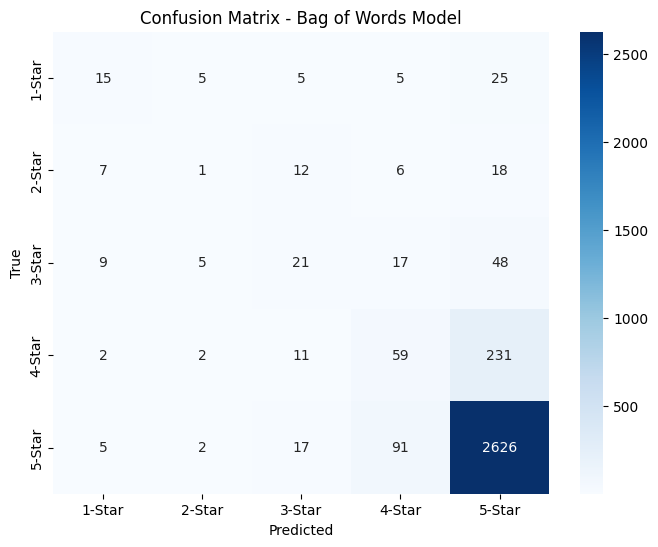

In [166]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter missing or invalid rows
bow_df = df.dropna(subset=['text', 'stars'])
bow_df = bow_df[bow_df['stars'].between(1, 5)]  # Ensure stars range is 1-5

# Step 2: Preprocess text and labels
bow_texts = bow_df['text'].astype(str)
bow_labels = bow_df['stars'] - 1  # Convert labels to 0-based indexing

# Step 3: Split into train and test sets
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(
    bow_texts, bow_labels, test_size=0.2, random_state=42
)

# Step 4: Vectorize the text data using Bag of Words
vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 words
bow_X_train_vec = vectorizer.fit_transform(bow_X_train)
bow_X_test_vec = vectorizer.transform(bow_X_test)

# Step 5: Train a Logistic Regression model
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(bow_X_train_vec, bow_y_train)

# Step 6: Make predictions
bow_y_pred = classifier.predict(bow_X_test_vec)

# Step 7: Evaluate the model
f1 = f1_score(bow_y_test, bow_y_pred, average='weighted')
print(f"Test F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(bow_y_test, bow_y_pred, target_names=[f"{i+1}-Star" for i in range(5)]))

# Confusion Matrix
cm = confusion_matrix(bow_y_test, bow_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"{i+1}-Star" for i in range(5)], yticklabels=[f"{i+1}-Star" for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Bag of Words Model')
plt.show()

### Bidirectional LSTM

Training labels: [0 1 2 3 4]
Test labels: [0 1 2 3 4]
Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


406/406 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.6934 - val_loss: 0.5419
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.5265 - val_loss: 0.5270
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.4901 - val_loss: 0.4988
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.4264 - val_loss: 0.5087
Epoch 5/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.3818 - val_loss: 0.5078
Epoch 6/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.3577 - val_loss: 0.5224
Epoch 7/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.3234 - val_loss: 0.6126
Epoch 8/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.2761 - val_loss: 0.6204
Epoch 9/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.2652 - val_loss: 0.6184
Epoch 10/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.2650 - val_loss: 0.6207
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Test F1 Score: 0.8065


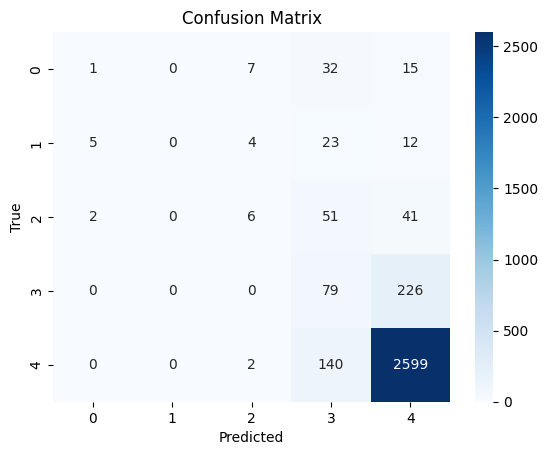

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.02      0.03        55
           1       0.00      0.00      0.00        44
           2       0.32      0.06      0.10       100
           3       0.24      0.26      0.25       305
           4       0.90      0.95      0.92      2741

    accuracy                           0.83      3245
   macro avg       0.32      0.26      0.26      3245
weighted avg       0.79      0.83      0.81      3245



/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [167]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter missing or invalid rows
nlp_df = df.dropna(subset=['text', 'stars'])
nlp_df = nlp_df[nlp_df['stars'].between(0, 5)]  # Ensure stars range is 0-5

# Step 2: Preprocess text and labels
nlp_texts = nlp_df['text'].astype(str)
nlp_labels = nlp_df['stars']

# Step 3: Split into train and test sets
nlp_X_train, nlp_X_test, nlp_y_train, nlp_y_test = train_test_split(
    nlp_texts, nlp_labels, test_size=0.2, random_state=42
)

# Convert labels to 0-based indexing
nlp_y_train = nlp_y_train - 1
nlp_y_test = nlp_y_test - 1

# Check for valid range
print(f"Training labels: {np.unique(nlp_y_train)}")
print(f"Test labels: {np.unique(nlp_y_test)}")

# Step 4: Tokenize the text data
nlp_max_words = 10000  # Vocabulary size
nlp_max_len = 100      # Max length of padded sequences

nlp_tokenizer = Tokenizer(num_words=nlp_max_words, oov_token='<OOV>')
nlp_tokenizer.fit_on_texts(nlp_X_train)

nlp_X_train_seq = nlp_tokenizer.texts_to_sequences(nlp_X_train)
nlp_X_test_seq = nlp_tokenizer.texts_to_sequences(nlp_X_test)

nlp_X_train_padded = pad_sequences(nlp_X_train_seq, maxlen=nlp_max_len, padding='post', truncating='post')
nlp_X_test_padded = pad_sequences(nlp_X_test_seq, maxlen=nlp_max_len, padding='post', truncating='post')

# Step 5: Build the NLP model with Bidirectional LSTM
nlp_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=nlp_max_words, output_dim=64, input_length=nlp_max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(nlp_y_train)), activation='softmax')  # Use dynamic number of classes
])

nlp_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=[])

# Step 6: Train the model
nlp_history = nlp_model.fit(
    nlp_X_train_padded, nlp_y_train,
    epochs=10,
    validation_data=(nlp_X_test_padded, nlp_y_test),
    batch_size=32
)

# Step 7: Generate predictions
nlp_y_pred_probs = nlp_model.predict(nlp_X_test_padded)
nlp_y_pred = nlp_y_pred_probs.argmax(axis=1)

# Step 8: F1 Score
f1 = f1_score(nlp_y_test, nlp_y_pred, average='weighted')
print(f"Test F1 Score: {f1:.4f}")

# Step 9: Confusion Matrix
nlp_cm = confusion_matrix(nlp_y_test, nlp_y_pred)
sns.heatmap(nlp_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(nlp_y_test), 
            yticklabels=np.unique(nlp_y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Classification Report
unique_classes = np.unique(nlp_y_test)  # Dynamically determine present classes
target_names = [str(label) for label in unique_classes]
print("Classification Report:")
print(classification_report(nlp_y_test, nlp_y_pred, target_names=target_names))

## CNN Model

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6902 - val_loss: 0.4755
Epoch 2/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4223 - val_loss: 0.4680
Epoch 3/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3290 - val_loss: 0.5084
Epoch 4/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2224 - val_loss: 0.5781
Epoch 5/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1329 - val_loss: 0.6753
Epoch 6/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0817 - val_loss: 0.7684
Epoch 7/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0538 - val_loss: 0.8867
Epoch 8/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0328 - val_loss: 0.9373
Epoch 9/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0236 - val_loss: 1.0261
Epoch 10/10
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0176 - val_loss: 1.0817
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
Test F1 Score: 0.8067


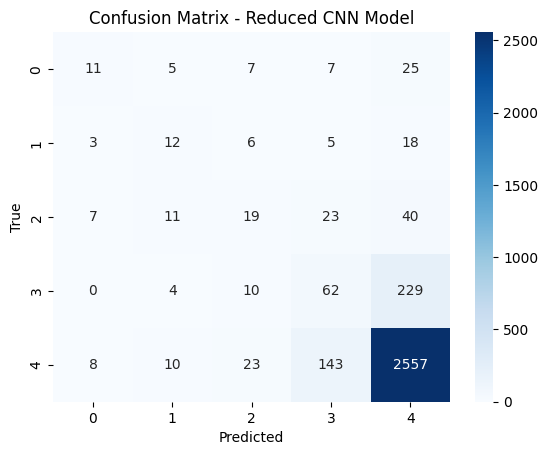

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        55
           1       0.29      0.27      0.28        44
           2       0.29      0.19      0.23       100
           3       0.26      0.20      0.23       305
           4       0.89      0.93      0.91      2741

    accuracy                           0.82      3245
   macro avg       0.42      0.36      0.38      3245
weighted avg       0.80      0.82      0.81      3245



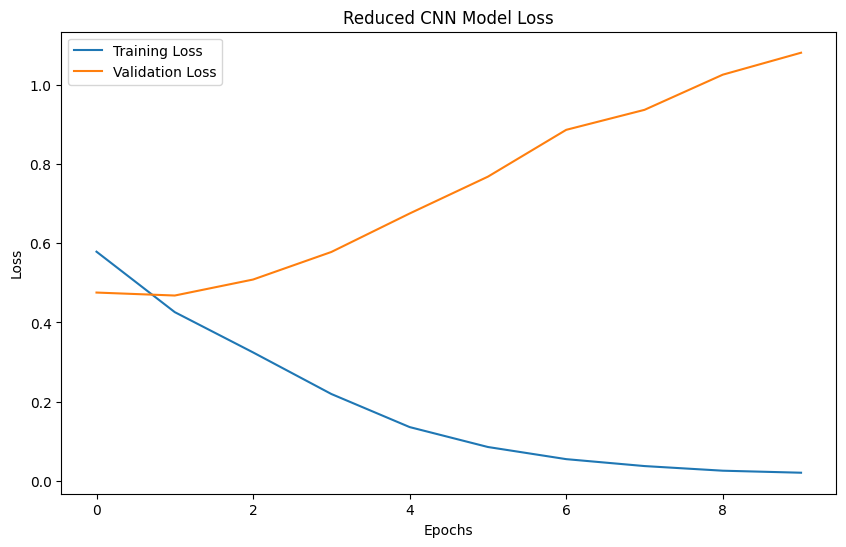

In [168]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing Function
def preprocess_text_cnn(text):
    # Lowercase conversion
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Return cleaned text
    return ' '.join(tokens)

# Step 1: Filter missing or invalid rows
cnn_df = df.dropna(subset=['text', 'stars'])
cnn_df = cnn_df[cnn_df['stars'].between(0, 5)]  # Ensure stars range is 0-5

# Step 2: Preprocess text and labels
cnn_texts = cnn_df['text'].astype(str).apply(preprocess_text_cnn)  # Apply preprocessing
cnn_labels = cnn_df['stars']

# Step 3: Split into train and test sets
cnn_X_train, cnn_X_test, cnn_y_train, cnn_y_test = train_test_split(
    cnn_texts, cnn_labels, test_size=0.2, random_state=42
)

# Convert labels to 0-based indexing
cnn_y_train = cnn_y_train - 1
cnn_y_test = cnn_y_test - 1

# Step 4: Tokenize the text data
cnn_max_words = 10000  # Vocabulary size
cnn_max_len = 100      # Max length of padded sequences

cnn_tokenizer = Tokenizer(num_words=cnn_max_words, oov_token='<OOV>')
cnn_tokenizer.fit_on_texts(cnn_X_train)

cnn_X_train_seq = cnn_tokenizer.texts_to_sequences(cnn_X_train)
cnn_X_test_seq = cnn_tokenizer.texts_to_sequences(cnn_X_test)

cnn_X_train_padded = pad_sequences(cnn_X_train_seq, maxlen=cnn_max_len, padding='post', truncating='post')
cnn_X_test_padded = pad_sequences(cnn_X_test_seq, maxlen=cnn_max_len, padding='post', truncating='post')

# Step 5: Build the CNN Model with Reduced Complexity
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=cnn_max_words, output_dim=64, input_length=cnn_max_len),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),  # Reduced filters (from 128 to 64), kernel size 3
    tf.keras.layers.GlobalMaxPooling1D(),  # Pooling layer
    tf.keras.layers.Dense(32, activation='relu'),  # Reduced neurons (from 64 to 32)
    tf.keras.layers.Dense(len(np.unique(cnn_y_train)), activation='softmax')  # Output layer for multi-class classification
])

cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=[])

# Step 6: Train the model
cnn_history = cnn_model.fit(
    cnn_X_train_padded, cnn_y_train,
    epochs=10,
    validation_data=(cnn_X_test_padded, cnn_y_test),
    batch_size=32
)

# Step 7: Generate predictions
cnn_y_pred_probs = cnn_model.predict(cnn_X_test_padded)
cnn_y_pred = cnn_y_pred_probs.argmax(axis=1)

# Step 8: F1 Score
f1 = f1_score(cnn_y_test, cnn_y_pred, average='weighted')
print(f"Test F1 Score: {f1:.4f}")

# Step 9: Confusion Matrix
cnn_cm = confusion_matrix(cnn_y_test, cnn_y_pred)
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(cnn_y_test), 
            yticklabels=np.unique(cnn_y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Reduced CNN Model')
plt.show()

# Step 10: Classification Report
unique_classes = np.unique(cnn_y_test)  # Dynamically determine present classes
target_names = [str(label) for label in unique_classes]
print("Classification Report:")
print(classification_report(cnn_y_test, cnn_y_pred, target_names=target_names))

# Step 11: Visualize Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Reduced CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Overfitting: The model is memorizing the training data instead of learning patterns that generalize to unseen data.
- The increasing gap between training and validation loss indicates the model is becoming too specialized for the training set and struggling with new data.

### Bigrams and Trigrams by Star Rating


Top Bigrams and Trigrams for 1-Star Ratings:
throw away: 10
waste time: 9
way much: 9
key lime: 8
way sweet: 7
lime pie: 6
wont making: 6
would recommend: 6
banana bread: 5
clam chowder: 5

Top Bigrams and Trigrams for 2-Star Ratings:
way much: 10
sour cream: 8
brown sugar: 7
cream cheese: 6
would use: 6
apple pie: 5
chicken broth: 5
much better: 5
salt pepper: 5
add salt: 4

Top Bigrams and Trigrams for 3-Star Ratings:
cream cheese: 17
brown sugar: 16
sour cream: 14
much better: 13
didnt care: 11
ground beef: 11
salt pepper: 10
also used: 9
first time: 9
cup sugar: 8


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top Bigrams and Trigrams for 4-Star Ratings:
sour cream: 64
cream cheese: 51
also added: 49
first time: 47
brown sugar: 41
really liked: 38
chicken broth: 34
also used: 32
ground beef: 32
diced tomato: 25

Top Bigrams and Trigrams for 5-Star Ratings:
family loved: 378
sour cream: 370
first time: 369
banana bread: 364
ive made: 350
family love: 297
everyone loved: 283
cream cheese: 277
also used: 251
brown sugar: 247


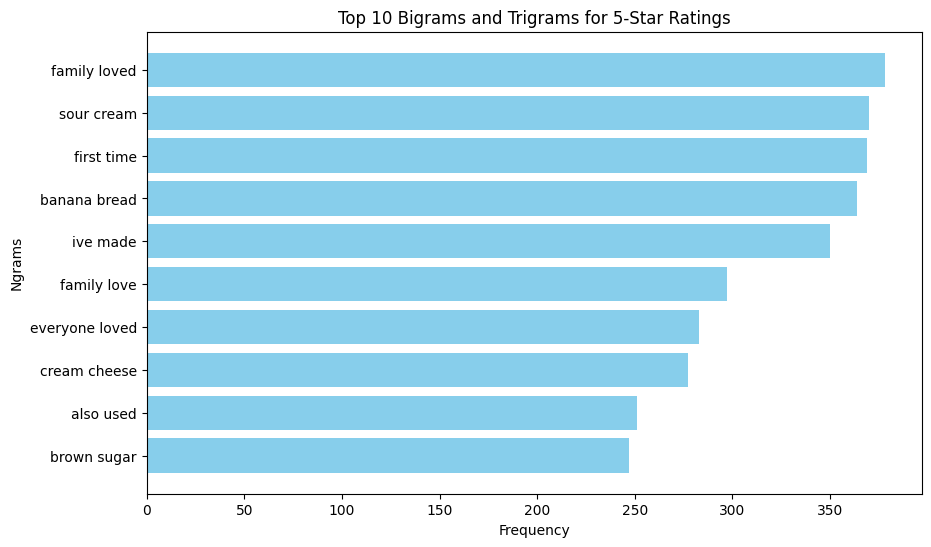

In [169]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re

# Step 1: Ensure you have the necessary NLTK stopwords installed
import nltk
nltk.download('stopwords')

# Step 2: Define a custom stopword list
stop_words = set(stopwords.words('english'))
# Extend with custom stop words and common contractions
additional_stop_words = {'39', 've', 'don', 'll', 'didn', 'doesn', 'wasn', 'won', 'like', 'make', 'good', 'recipe', 'followed', 'next time'}
stop_words.update(additional_stop_words)

# Step 3: Preprocessing function to clean text
def clean_text(text):
    """
    Cleans text by removing punctuation, lowercasing, and filtering stopwords.
    """
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    words = text.lower().split()
    return " ".join([word for word in words if word not in stop_words])

# Step 4: Clean the text data
df['cleaned_text'] = df['text'].astype(str).apply(clean_text)

# Step 5: Function for extracting bigrams and trigrams
def get_ngrams(corpus, ngram_range=(2, 3), top_n=20):
    """
    Extract top n bigrams and trigrams from the corpus.

    Args:
    - corpus (list of str): Text data
    - ngram_range (tuple): Range of ngrams to extract (e.g., (2, 3) for bigrams and trigrams)
    - top_n (int): Number of top ngrams to return

    Returns:
    - Counter: Counter object with top ngrams and their frequencies
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngram_matrix = vectorizer.fit_transform(corpus)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_counter = Counter(dict(zip(ngram_vocab, ngram_counts)))
    # Remove 'next time' ngram
    ngram_counter = Counter({key: count for key, count in ngram_counter.items() if 'next time' not in key})
    return ngram_counter.most_common(top_n)

# Step 6: Generate bigrams and trigrams for each star rating
for star in sorted(df['stars'].unique()):
    star_texts = df[df['stars'] == star]['cleaned_text']
    print(f"\nTop Bigrams and Trigrams for {star}-Star Ratings:")
    top_ngrams = get_ngrams(star_texts, ngram_range=(2, 3), top_n=10)
    for ngram, count in top_ngrams:
        print(f"{ngram}: {count}")

# Step 7 (Optional): Visualize ngrams for a specific star rating
def plot_ngrams(star_rating, ngram_range=(2, 3), top_n=10):
    """
    Plot the top ngrams for a specific star rating.

    Args:
    - star_rating (int): The star rating to filter on
    - ngram_range (tuple): Range of ngrams to extract
    - top_n (int): Number of top ngrams to visualize
    """
    star_texts = df[df['stars'] == star_rating]['cleaned_text']
    top_ngrams = get_ngrams(star_texts, ngram_range=ngram_range, top_n=top_n)
    
    # Prepare data for plotting
    ngrams, counts = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Ngrams')
    plt.title(f'Top {top_n} Bigrams and Trigrams for {star_rating}-Star Ratings')
    plt.gca().invert_yaxis()
    plt.show()

# Example: Plot for 5-star ratings
plot_ngrams(star_rating=5, ngram_range=(2, 3), top_n=10)

### Word Cloud

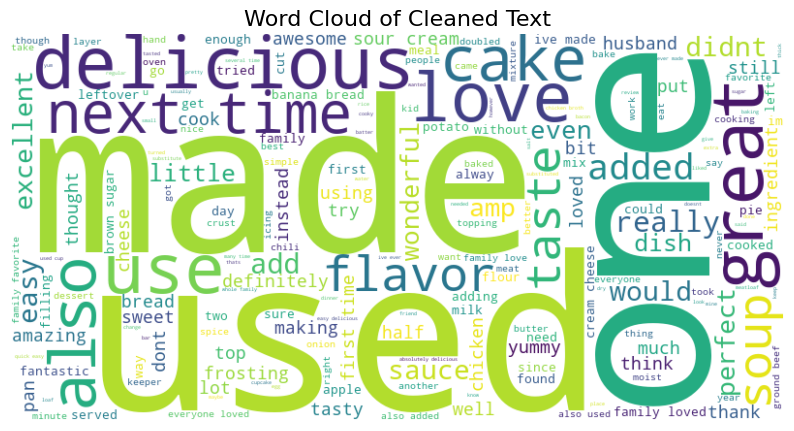

In [170]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
text_data = " ".join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    stopwords=stop_words  # Use the custom stopwords defined earlier
).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a word cloud
plt.title('Word Cloud of Cleaned Text', fontsize=16)
plt.show()

# Time Series Model (forecasting star ratings)

### SARIMA & Prophet

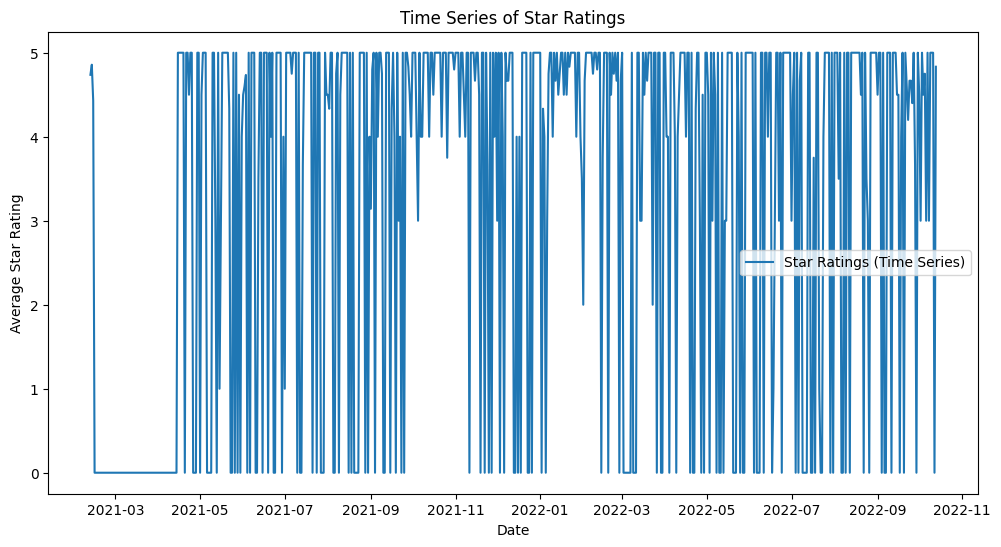

20:56:08 - cmdstanpy - INFO - Chain [1] start processing
20:56:08 - cmdstanpy - INFO - Chain [1] done processing


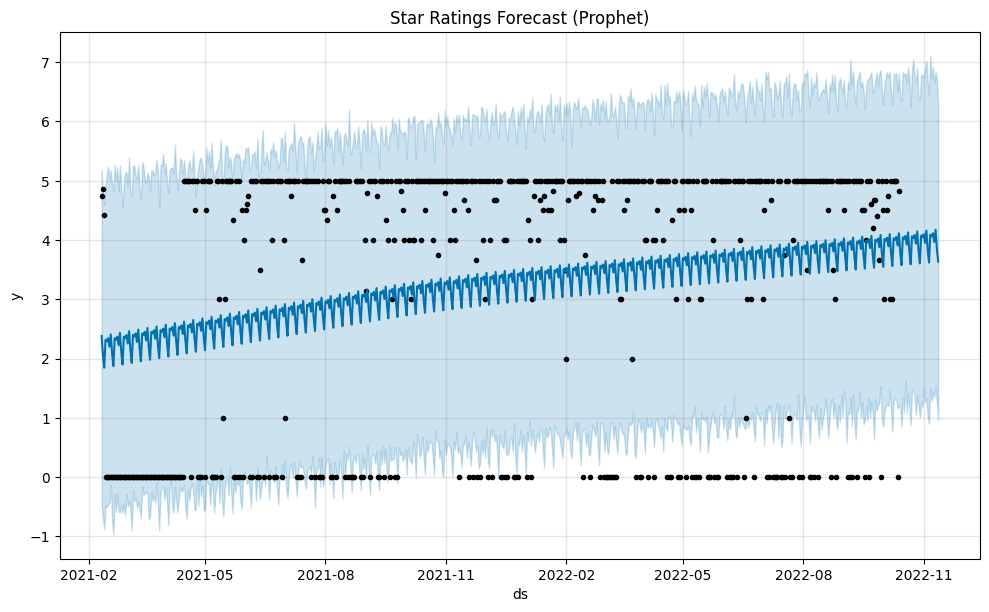

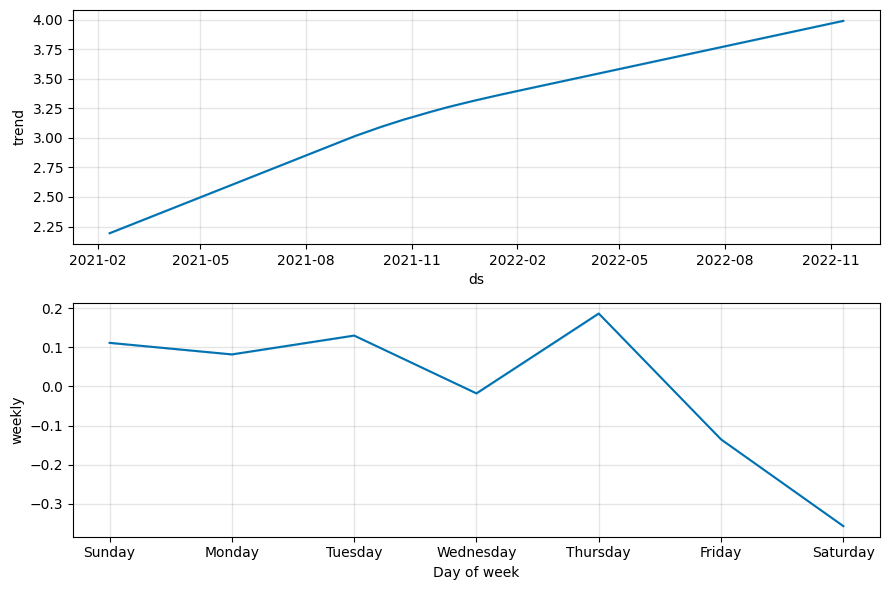

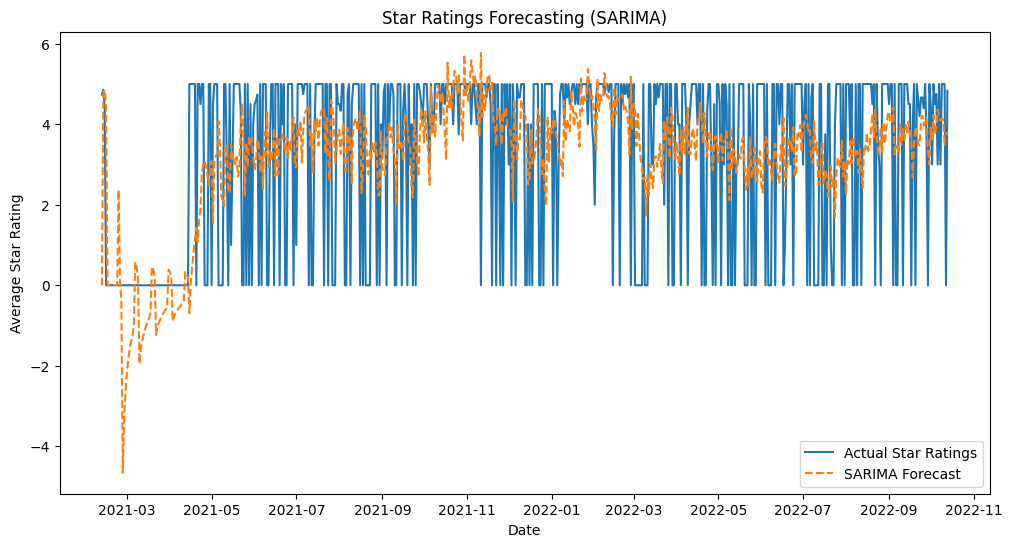


Star Ratings Forecast (Next 30 Days):
      Date  Prophet Forecast  Prophet Lower Bound  Prophet Upper Bound  SARIMA Forecast
2022-10-14          3.794357             1.187201             6.401533         3.878290
2022-10-15          3.574871             0.846878             6.344142         4.414770
2022-10-16          4.045161             1.346619             6.832992         3.825225
2022-10-17          4.017719             1.092822             6.774702         3.978524
2022-10-18          4.067925             1.619927             6.816160         4.190606
2022-10-19          3.922316             1.079093             6.644388         4.399013
2022-10-20          4.128449             1.408080             6.911448         3.985810
2022-10-21          3.808984             1.147671             6.699153         4.295983
2022-10-22          3.589499             0.875540             6.234081         4.211514
2022-10-23          4.059788             1.477386             6.876359         3.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

# Step 1: Parse 'created_at' column as datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Step 2: Aggregate data by time (daily mean of 'stars')
star_ratings_ts = df.groupby(pd.Grouper(key='created_at', freq='D'))['stars'].mean().reset_index()

# Fill missing dates with zero or interpolate missing values
star_ratings_ts['stars'] = star_ratings_ts['stars'].fillna(0)

# Step 3: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Star Ratings (Time Series)')
plt.title('Time Series of Star Ratings')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

# Step 4: Prepare data for Prophet
prophet_star_data = star_ratings_ts.rename(columns={'created_at': 'ds', 'stars': 'y'})

# Step 5: Fit Prophet Model
star_prophet_model = Prophet()
star_prophet_model.fit(prophet_star_data)

# Step 6: Make future predictions
star_future = star_prophet_model.make_future_dataframe(periods=30)  # Forecast next 30 days
star_forecast = star_prophet_model.predict(star_future)

# Extract Prophet forecasted values for the next 30 days
prophet_forecast_next_30 = star_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

# Step 7: Plot forecast
fig = star_prophet_model.plot(star_forecast)
plt.title("Star Ratings Forecast (Prophet)")
plt.show()

# Optional: Seasonal Decomposition with Prophet
fig2 = star_prophet_model.plot_components(star_forecast)
plt.show()

# Step 8: Use SARIMAX for time series modeling (optional)
sarima_model_star = SARIMAX(
    star_ratings_ts['stars'], 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 12)
)
sarima_star_result = sarima_model_star.fit(disp=False)

# Forecast the next 30 days using SARIMA
sarima_forecast_next_30 = sarima_star_result.get_forecast(steps=30)
sarima_forecast_summary = sarima_forecast_next_30.summary_frame()

# Add SARIMA forecast to the time series data for visualization
star_ratings_ts['sarima_forecast'] = sarima_star_result.predict(start=0, end=len(star_ratings_ts) - 1)

# Step 9: Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Actual Star Ratings')
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['sarima_forecast'], label='SARIMA Forecast', linestyle='--')
plt.title('Star Ratings Forecasting (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

# Step 10: Combine Prophet and SARIMA forecasts into a summary table
forecast_summary = pd.DataFrame({
    'Date': prophet_forecast_next_30['ds'],
    'Prophet Forecast': prophet_forecast_next_30['yhat'],
    'Prophet Lower Bound': prophet_forecast_next_30['yhat_lower'],
    'Prophet Upper Bound': prophet_forecast_next_30['yhat_upper'],
    'SARIMA Forecast': sarima_forecast_summary['mean']
}).reset_index(drop=True)

# Print the summary table
print("\nStar Ratings Forecast (Next 30 Days):")
print(forecast_summary.to_string(index=False))

### Forecast for Specific Recipes

In [172]:
df['recipe_name'].value_counts()

recipe_name
Cheeseburger Soup               642
Creamy White Chili              539
Best Ever Banana Bread          482
Favorite Chicken Potpie         364
Flavorful Chicken Fajitas       344
                               ... 
Blueberry French Toast           80
Lime Chicken Tacos               76
Peanut Butter Cup Cheesecake     75
Caramel Heavenlies               60
Vegetarian Linguine              28
Name: count, Length: 100, dtype: int64

Based on stars


Recent Star Ratings for Cheeseburger Soup:
              created_at  stars
1163 2022-10-06 16:59:51      3
1164 2022-09-26 12:19:30      2
1165 2022-09-26 03:52:04      5
1166 2022-09-19 14:11:42      5
1167 2022-09-09 23:38:21      5
1168 2022-09-02 19:29:12      5
1169 2022-08-28 07:26:01      5
1170 2022-08-04 00:51:08      5
1171 2022-07-30 08:44:38      5
1172 2022-05-17 22:43:11      5


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_34016/80804065.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce')


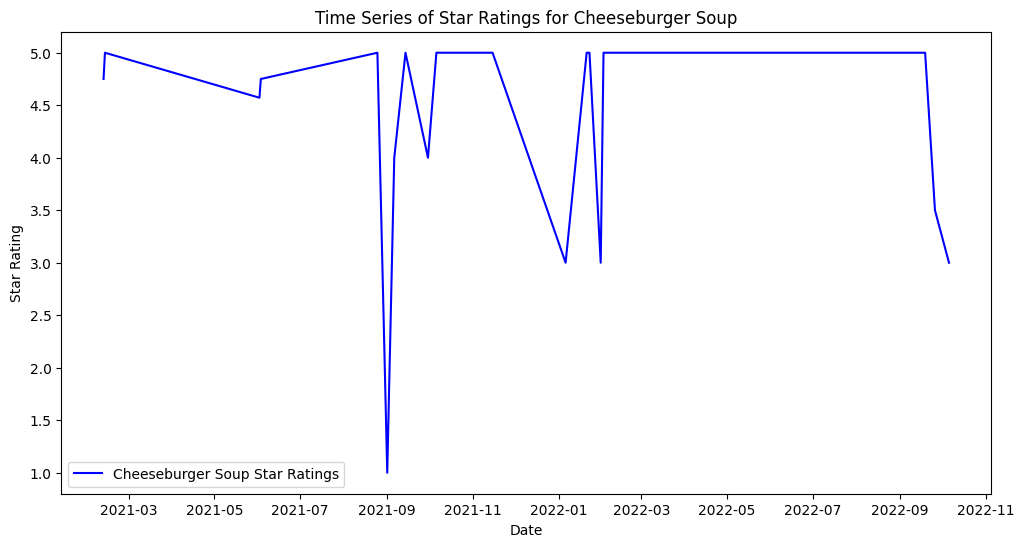

20:56:11 - cmdstanpy - INFO - Chain [1] start processing
20:56:11 - cmdstanpy - INFO - Chain [1] done processing


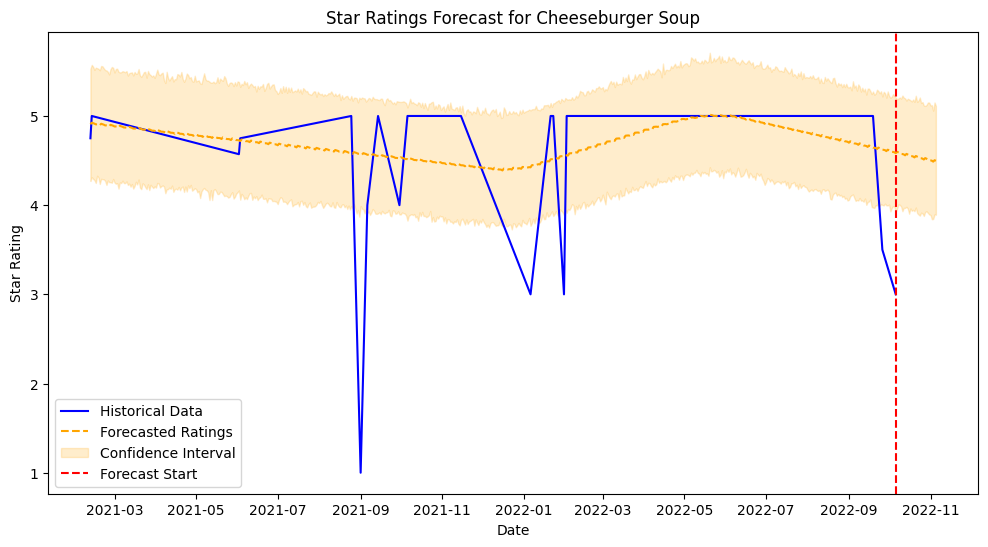

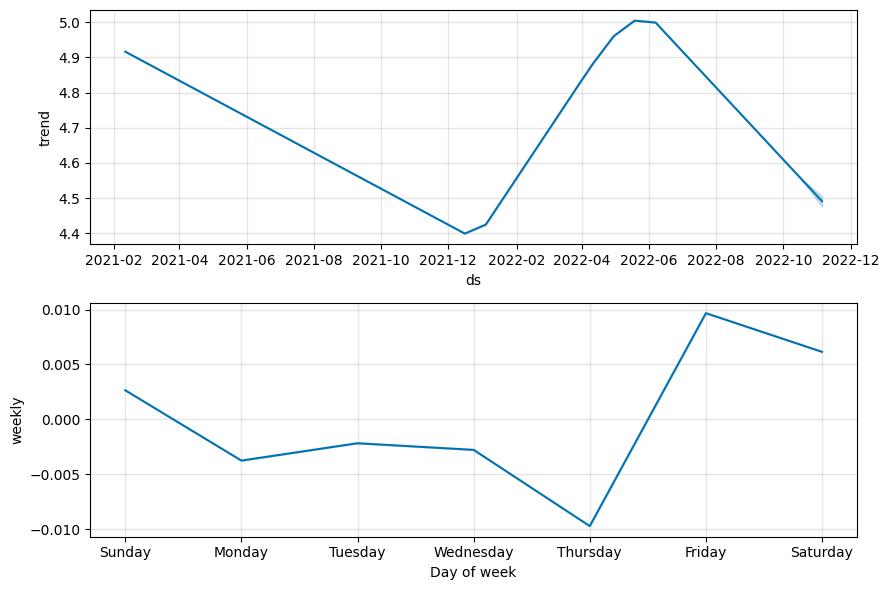


Forecasted Ratings
      Date  Predicted Star Rating  Lower Confidence Bound  Upper Confidence Bound
2022-10-07               4.598316                3.959155                5.186024
2022-10-08               4.591425                4.007994                5.195928
2022-10-09               4.584555                4.003463                5.207013
2022-10-10               4.574783                3.986402                5.195024
2022-10-11               4.572996                3.931712                5.229440
2022-10-12               4.569025                3.969165                5.205069
2022-10-13               4.558714                3.968742                5.197196
2022-10-14               4.574745                3.981184                5.172673
2022-10-15               4.567854                3.961973                5.193425
2022-10-16               4.560984                3.903869                5.185989
2022-10-17               4.551213                3.963230                5.175

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Filter dataset for a specific recipe
recipe_name_filter = "Cheeseburger Soup"
filtered_df = df[df['recipe_name'] == recipe_name_filter]

# Ensure the filtered DataFrame is not empty
if filtered_df.empty:
    raise ValueError(f"No data available for the recipe: {recipe_name_filter}")

# Inspect recent data trends
print(f"\nRecent Star Ratings for {recipe_name_filter}:")
print(filtered_df[['created_at', 'stars']].sort_values(by='created_at', ascending=False).head(10))

# Step 2: Parse 'created_at' column as datetime
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['created_at'])  # Drop rows with invalid dates

# Step 3: Aggregate data by date (e.g., daily mean of 'stars')
recipe_ts = (
    filtered_df.groupby(pd.Grouper(key='created_at', freq='D'))['stars']
    .mean()
    .reset_index()
)

# Ensure there are no missing dates and fill gaps
recipe_ts['stars'] = recipe_ts['stars'].interpolate().fillna(0)

# Step 4: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(recipe_ts['created_at'], recipe_ts['stars'], label=f'{recipe_name_filter} Star Ratings', color='blue')
plt.title(f'Time Series of Star Ratings for {recipe_name_filter}')
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 5: Prepare data for Prophet
prophet_data = recipe_ts.rename(columns={'created_at': 'ds', 'stars': 'y'})

# Step 6: Fit Prophet model
recipe_prophet_model = Prophet()
recipe_prophet_model.fit(prophet_data)

# Step 7: Make future predictions
future = recipe_prophet_model.make_future_dataframe(periods=30)
forecast = recipe_prophet_model.predict(future)

# Step 8: Rename the forecast columns for clarity (after Prophet operations)
forecast_renamed = forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted Star Rating',
    'yhat_lower': 'Lower Confidence Bound',
    'yhat_upper': 'Upper Confidence Bound'
})

# Step 9: Plot the forecast with forecasted values highlighted
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Ratings', color='orange', linestyle='--')
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='orange', 
    alpha=0.2, 
    label='Confidence Interval'
)
plt.axvline(x=prophet_data['ds'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title(f"Star Ratings Forecast for {recipe_name_filter}")
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 10: Seasonal decomposition (keep 'ds' column for Prophet compatibility)
fig2 = recipe_prophet_model.plot_components(forecast)
plt.show()

clear_forecasted_ratings = forecast_renamed[['Date', 'Predicted Star Rating', 'Lower Confidence Bound', 'Upper Confidence Bound']].tail(30)
print("\nForecasted Ratings")
print(clear_forecasted_ratings.to_string(index=False))

### ARIMA Model

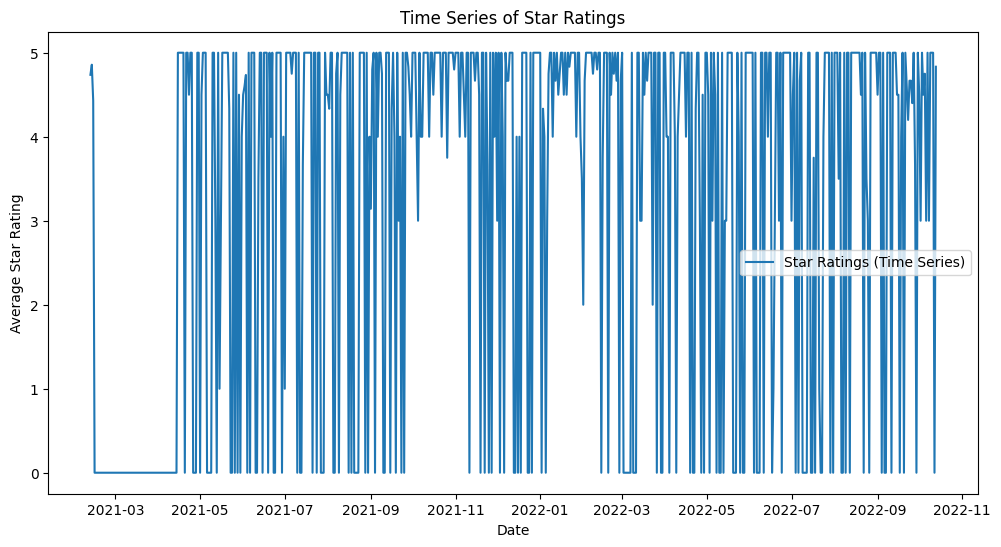

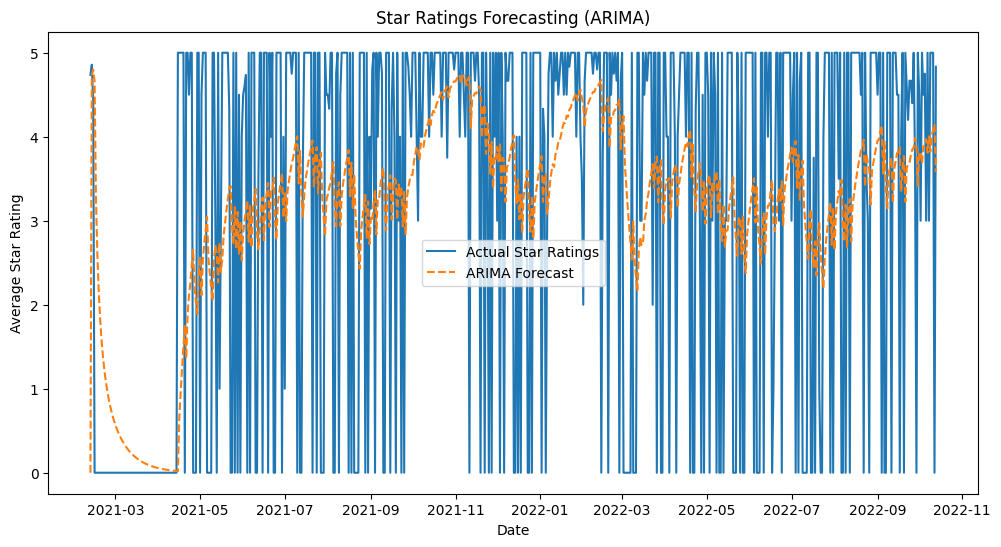

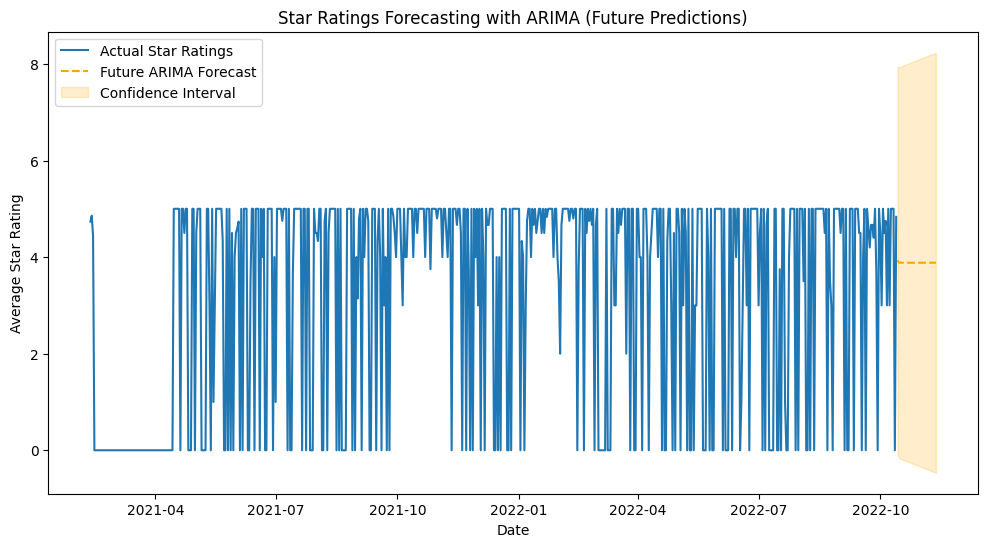

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Parse 'created_at' column as datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Step 2: Aggregate data by time (daily mean of 'stars')
star_ratings_ts = df.groupby(pd.Grouper(key='created_at', freq='D'))['stars'].mean().reset_index()

# Fill missing dates with zero or interpolate missing values
star_ratings_ts['stars'] = star_ratings_ts['stars'].fillna(0)

# Step 3: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Star Ratings (Time Series)')
plt.title('Time Series of Star Ratings')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

# Step 4: Fit ARIMA model
# Define the ARIMA model (p=1, d=1, q=1 as an example; adjust based on ACF/PACF analysis or trial-and-error)
arima_model_star = ARIMA(star_ratings_ts['stars'], order=(1, 1, 1))
arima_star_result = arima_model_star.fit()

# Step 5: Add ARIMA forecast to the time series data
star_ratings_ts['arima_forecast'] = arima_star_result.predict(start=0, end=len(star_ratings_ts) - 1)

# Step 6: Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Actual Star Ratings')
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['arima_forecast'], label='ARIMA Forecast', linestyle='--')
plt.title('Star Ratings Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

# Step 7: Future Forecast with ARIMA
# Extend the forecast for future dates
future_steps = 30
future_forecast = arima_star_result.get_forecast(steps=future_steps)

# Get forecasted values and confidence intervals
forecasted_values = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int()

# Step 8: Plot future ARIMA forecast
future_dates = pd.date_range(start=star_ratings_ts['created_at'].iloc[-1], periods=future_steps + 1, freq='D')[1:]
plt.figure(figsize=(12, 6))
plt.plot(star_ratings_ts['created_at'], star_ratings_ts['stars'], label='Actual Star Ratings')
plt.plot(future_dates, forecasted_values, label='Future ARIMA Forecast', linestyle='--', color='orange')
plt.fill_between(future_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title('Star Ratings Forecasting with ARIMA (Future Predictions)')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

### Specific Recipe ARIMA Model


Recent Star Ratings for Cheeseburger Soup:
              created_at  stars
1163 2022-10-06 16:59:51      3
1164 2022-09-26 12:19:30      2
1165 2022-09-26 03:52:04      5
1166 2022-09-19 14:11:42      5
1167 2022-09-09 23:38:21      5
1168 2022-09-02 19:29:12      5
1169 2022-08-28 07:26:01      5
1170 2022-08-04 00:51:08      5
1171 2022-07-30 08:44:38      5
1172 2022-05-17 22:43:11      5


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_34016/56063233.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce')


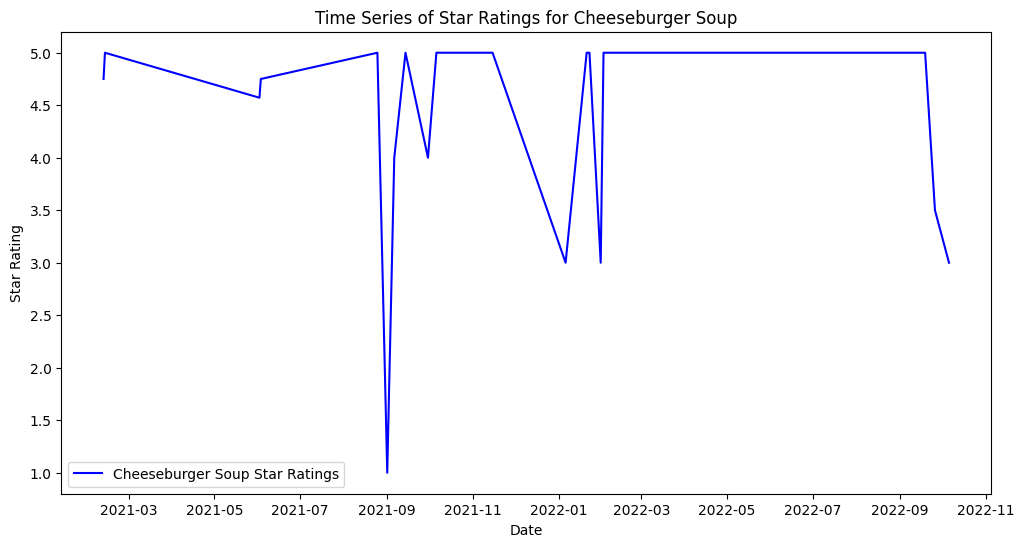

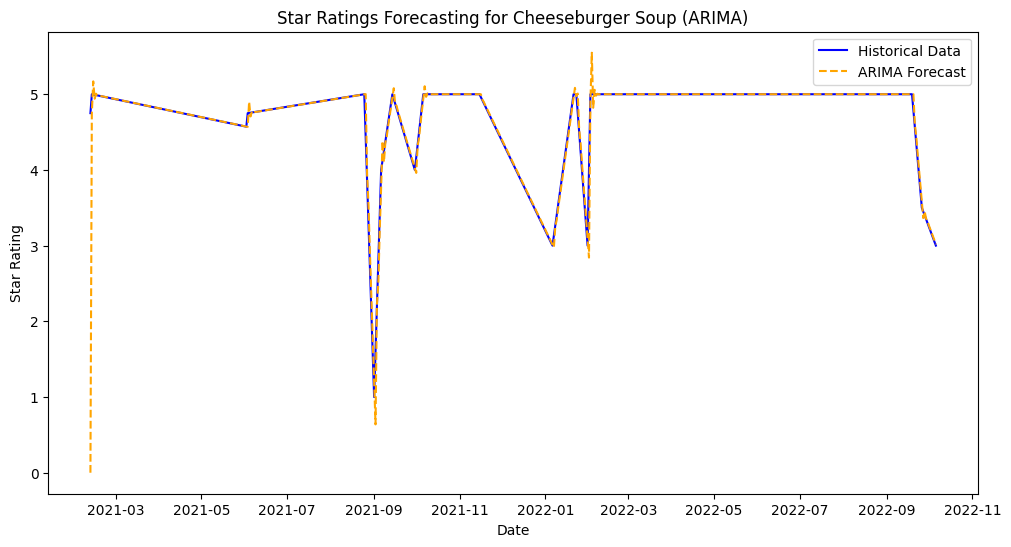

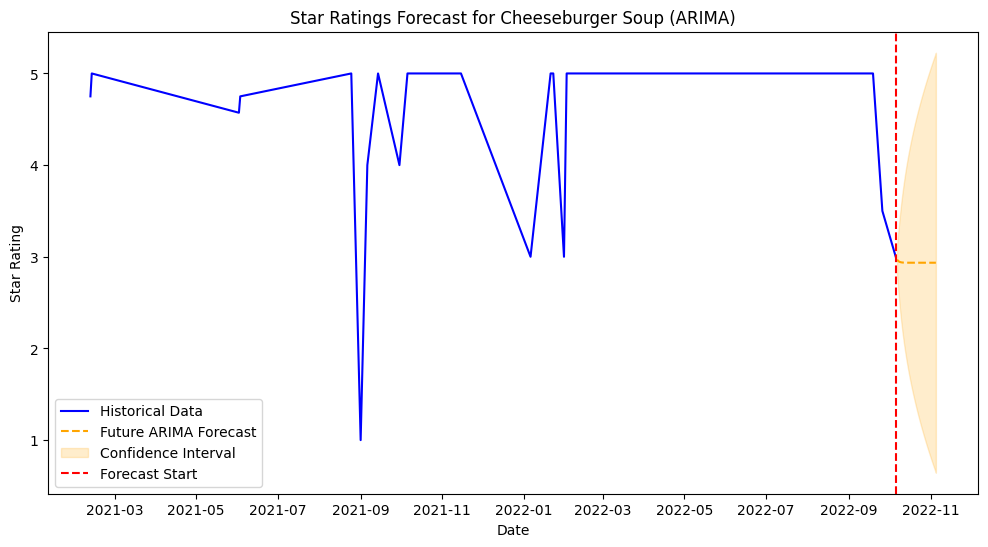


Forecasted Ratings:
      Date  Predicted Star Rating  Lower Confidence Bound  Upper Confidence Bound
2022-10-07               2.968380                2.809070                3.127689
2022-10-08               2.952174                2.618750                3.285598
2022-10-09               2.943868                2.452177                3.435560
2022-10-10               2.939612                2.307993                3.571230
2022-10-11               2.937430                2.181978                3.692882
2022-10-12               2.936312                2.070172                3.802452
2022-10-13               2.935739                1.969450                3.902027
2022-10-14               2.935445                1.877471                3.993419
2022-10-15               2.935295                1.792502                4.078087
2022-10-16               2.935217                1.713256                4.157179
2022-10-17               2.935178                1.638764                4.23

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Filter dataset for a specific recipe
recipe_name_filter = "Cheeseburger Soup"
filtered_df = df[df['recipe_name'] == recipe_name_filter]

# Ensure the filtered DataFrame is not empty
if filtered_df.empty:
    raise ValueError(f"No data available for the recipe: {recipe_name_filter}")

# Inspect recent data trends
print(f"\nRecent Star Ratings for {recipe_name_filter}:")
print(filtered_df[['created_at', 'stars']].sort_values(by='created_at', ascending=False).head(10))

# Step 2: Parse 'created_at' column as datetime
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['created_at'])  # Drop rows with invalid dates

# Step 3: Aggregate data by date (e.g., daily mean of 'stars')
recipe_ts = (
    filtered_df.groupby(pd.Grouper(key='created_at', freq='D'))['stars']
    .mean()
    .reset_index()
)

# Ensure there are no missing dates and fill gaps
recipe_ts['stars'] = recipe_ts['stars'].interpolate().fillna(0)

# Step 4: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(recipe_ts['created_at'], recipe_ts['stars'], label=f'{recipe_name_filter} Star Ratings', color='blue')
plt.title(f'Time Series of Star Ratings for {recipe_name_filter}')
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 5: Fit ARIMA model
# Define ARIMA model (p=1, d=1, q=1 as an example; tune these parameters as needed)
arima_model = ARIMA(recipe_ts['stars'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Step 6: Add ARIMA forecast to the time series data
recipe_ts['arima_forecast'] = arima_result.predict(start=0, end=len(recipe_ts) - 1)

# Step 7: Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(recipe_ts['created_at'], recipe_ts['stars'], label='Historical Data', color='blue')
plt.plot(recipe_ts['created_at'], recipe_ts['arima_forecast'], label='ARIMA Forecast', color='orange', linestyle='--')
plt.title(f'Star Ratings Forecasting for {recipe_name_filter} (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 8: Forecast future values
# Extend the forecast for the next 30 days
future_steps = 30
future_forecast = arima_result.get_forecast(steps=future_steps)

# Extract predicted values and confidence intervals
forecasted_values = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int()

# Generate future dates for the forecast
last_date = recipe_ts['created_at'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='D')[1:]

# Step 9: Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(recipe_ts['created_at'], recipe_ts['stars'], label='Historical Data', color='blue')
plt.plot(future_dates, forecasted_values, label='Future ARIMA Forecast', color='orange', linestyle='--')
plt.fill_between(
    future_dates, 
    forecast_ci.iloc[:, 0], 
    forecast_ci.iloc[:, 1], 
    color='orange', 
    alpha=0.2, 
    label='Confidence Interval'
)
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.title(f"Star Ratings Forecast for {recipe_name_filter} (ARIMA)")
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 10: Display forecasted ratings
forecasted_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted Star Rating': forecasted_values,
    'Lower Confidence Bound': forecast_ci.iloc[:, 0],
    'Upper Confidence Bound': forecast_ci.iloc[:, 1]
})
print("\nForecasted Ratings:")
print(forecasted_results.to_string(index=False))